# Intro
Name:  

    ARISE_cloud_edge_v2

Purpose:  

    Python scripts that builds the analysis for the ARISE data of the Septemebr 19th, 2014, Flgiht # 13
    Sets up maps and background information, then proceeds to produce cloud radiative properties from 4STAR transmitted data

Calling Sequence:

    python ARISE_cloud_edge.py
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - run_kisq_retrieval.py : for the retrieval functions
    - load_utils.py : for loading modis and other files
    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - math
    - os
    - gc
    - pdb : for debugging
    - datetime
    - mpl_toolkits
    - gdal (from osgeo)
    - plotting_utils (user defined plotting routines)
    - map_utils, dependent on geopy
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - AMSR-E map files (asi-AMSR2-n6250-20140919-v5.hdf and LongitudeLatitudeGrid-n6250-Arctic.hdf)
  - MODIS retrievals
  - CALIPSO overpass file
  - C130 nav data: arise-C130-Hskping_c130_20140919_RA_Preliminary.ict
  - Probes data: ARISE-LARGE-PROBES_C130_20140919_R0.ict
  
 Modification History:
 
     Written: by Samuel LeBlanc, NASA Ames

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
#matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpltools import color
import numpy as np
import scipy.io as sio
import scipy
import math, os, IPython
import Sp_parameters as Sp
from Sp_parameters import nanmasked
import load_utils as lm
from scipy.interpolate import interp1d
from scipy import interpolate
IPython.InteractiveShell.cache_size = 0
# set the basic directory path
from path_utils import getpath
#fp='C:/Users/sleblan2/Research/ARISE/'

In [8]:
import matplotlib.cm as cm
import hdf5storage as hs
from mpl_toolkits.basemap import Basemap
import plotting_utils as pu
import map_utils as mu
import h5py

In [15]:
fp = getpath('ARISE')

Return path named:  ARISE /mnt/c/Users/lebla/Research/ARISE/


In [16]:
%matplotlib notebook

# Load varous data

## Get the AMSR data for 2014-09-19

In [18]:
famsr = fp+'AMSRE/asi-AMSR2-n6250-20140919-v5.4.hdf'
fll = fp+'AMSRE/LongitudeLatitudeGrid-n6250-Arctic.hdf'
amsr = lm.load_amsr(famsr,fll)

In [19]:
def plt_amsr(ax='None'):
    from mpl_toolkits.basemap import Basemap
    if not ax:
        fig = plt.figure()
    m = Basemap(projection='stere',lat_0=57,lon_0=-145,
               llcrnrlon=-170,llcrnrlat=53,
               urcrnrlon=-90,urcrnrlat=80 ,resolution='l')
    m.drawcountries()
    m.fillcontinents(color='grey')
    m.drawmeridians(np.linspace(-90,-200,12),labels=[0,0,0,1])
    m.drawparallels(np.linspace(53,80,10),labels=[1,0,0,0])
    x,y = m(amsr['lon'],amsr['lat'])
    clevels = np.linspace(0,100,21)
    cs = m.contourf(x,y,amsr['ice'],clevels,cmap=plt.cm.gist_earth)
    cbar = m.colorbar(cs)
    cbar.set_label('Ice concentration [\%]')
    return m

In [20]:
def plt_amsr_cnt(ax='None'):
    from mpl_toolkits.basemap import Basemap
    if not ax:
        fig = plt.figure()
    m = Basemap(projection='stere',lat_0=57,lon_0=-145,
               llcrnrlon=-170,llcrnrlat=53,
               urcrnrlon=-90,urcrnrlat=80 ,resolution='l')
    m.drawcountries()
    m.fillcontinents(color='grey')
    m.drawmeridians(np.linspace(-90,-200,12),labels=[0,0,0,1])
    m.drawparallels(np.linspace(53,80,10),labels=[1,0,0,0])
    x,y = m(amsr['lon'],amsr['lat'])
    clevels = np.linspace(0,100,21)
    clevels = [2.0,20.0,40.0,60.0,80.0,98.0]
    cs = m.contour(x,y,amsr['ice'],clevels,cmap=plt.cm.gist_earth,zorder=100)
    #cbar = m.colorbar(cs)
    #cbar.set_label('Ice concentration [\%]')
    return m

<IPython.core.display.Javascript object>


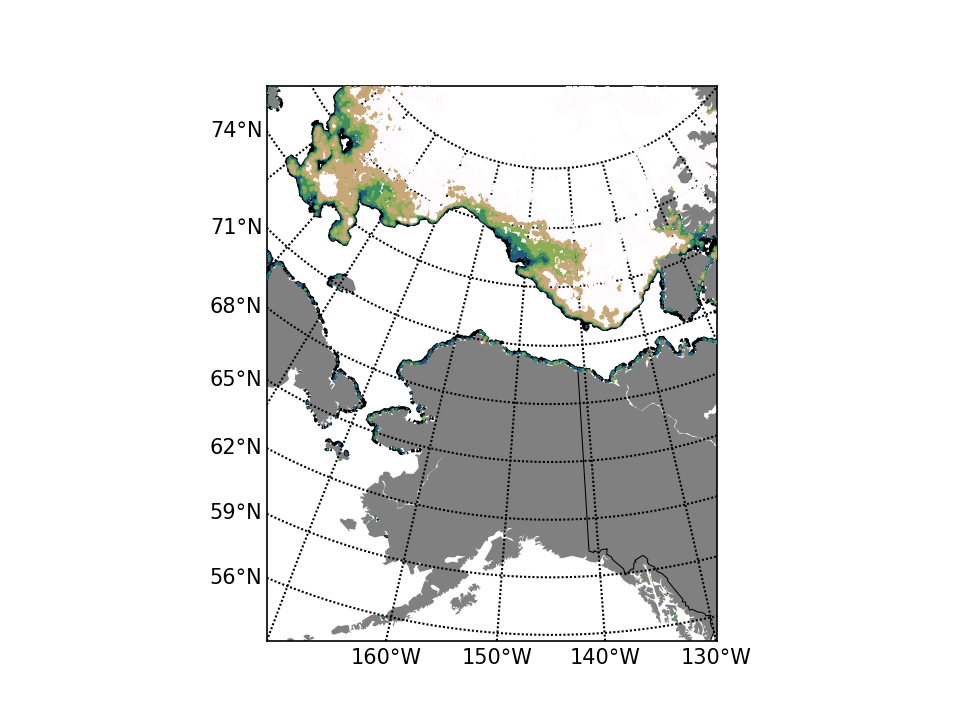

In [21]:
plt.figure()
m = plt_amsr_cnt()

<IPython.core.display.Javascript object>


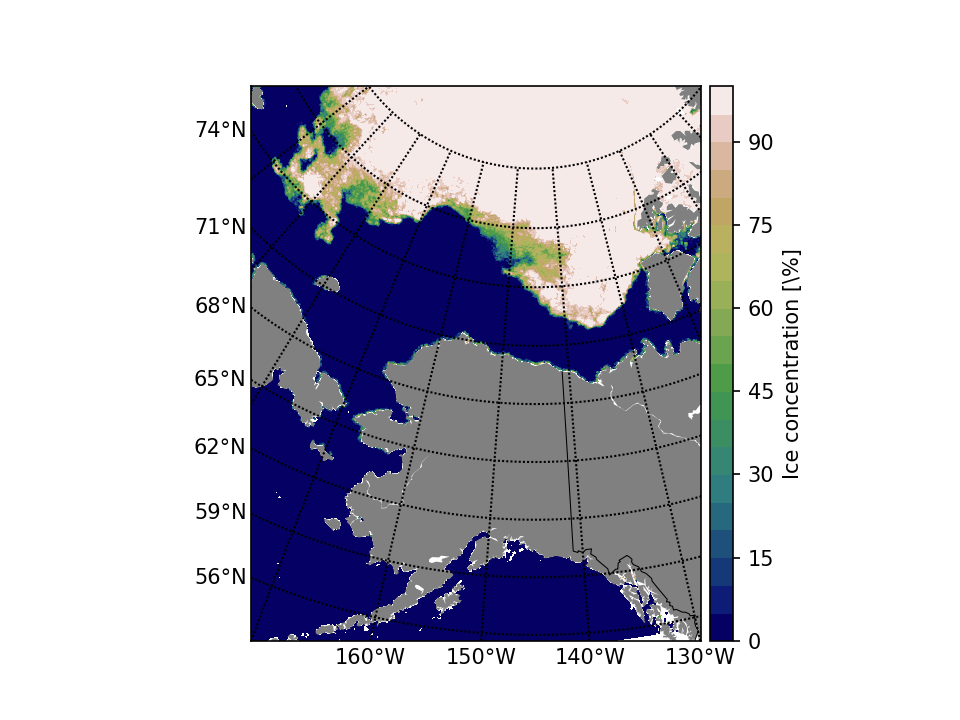

In [23]:
m = plt_amsr()

In [8]:
def plt_amsr_zoom(ax='None',colorbar=True):
    from mpl_toolkits.basemap import Basemap
    if not ax:
        fig = plt.figure()
    m = Basemap(projection='stere',lat_0=72,lon_0=-128,
                llcrnrlon=-136,llcrnrlat=71,
                urcrnrlon=-117.5,urcrnrlat=75,resolution='h')
    m.drawcountries()
    m.fillcontinents(color='grey')
    m.drawmeridians(np.linspace(-115,-145,11),labels=[0,0,0,1])
    m.drawparallels(np.linspace(60,75,16),labels=[1,0,0,0])
    x,y = m(amsr['lon'],amsr['lat'])
    clevels = np.linspace(0,100,21)
    cs = m.contourf(x,y,amsr['ice'],clevels,cmap=plt.cm.gist_earth)
    if colorbar:
        cbar = m.colorbar(cs)
        cbar.set_label('Ice concentration [\%]')
    return m

In [9]:
def plt_amsr_cnt_zoom(ax='None',return_cs=False):
    from mpl_toolkits.basemap import Basemap
    if not ax:
        fig = plt.figure()
    m = Basemap(projection='stere',lat_0=72,lon_0=-128,
                llcrnrlon=-136,llcrnrlat=71,
                urcrnrlon=-117.5,urcrnrlat=75,resolution='h')
    m.drawcountries()
    m.fillcontinents(color='grey')
    m.drawmeridians(np.linspace(-115,-145,11),labels=[0,0,0,1])
    m.drawparallels(np.linspace(60,75,16),labels=[1,0,0,0])
    x,y = m(amsr['lon'],amsr['lat'])
    clevels = np.linspace(0,100,21)
    
    clevels = [2.0,20.0,40.0,60.0,80.0,95.0,100.0]
    cs = m.contour(x,y,amsr['ice'],clevels,cmap=plt.cm.gist_earth,zorder=100)
    plt.clabel(cs, inline=1, fontsize=10)
    if return_cs:
        return m,cs
    else:
        return m

<IPython.core.display.Javascript object>


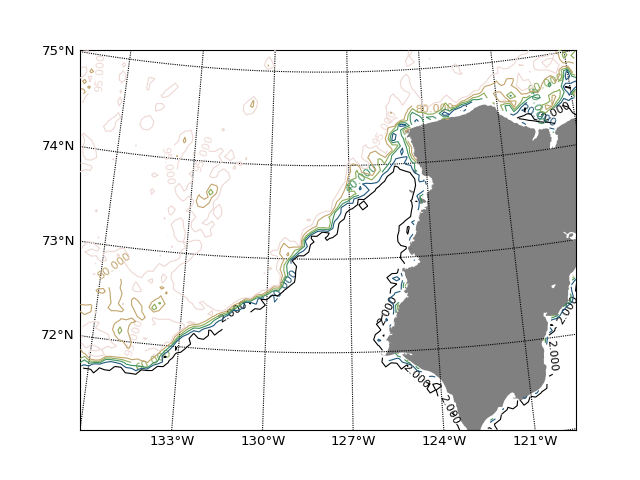

In [197]:
plt.figure()
m,cs = plt_amsr_cnt_zoom(return_cs=True)

<IPython.core.display.Javascript object>


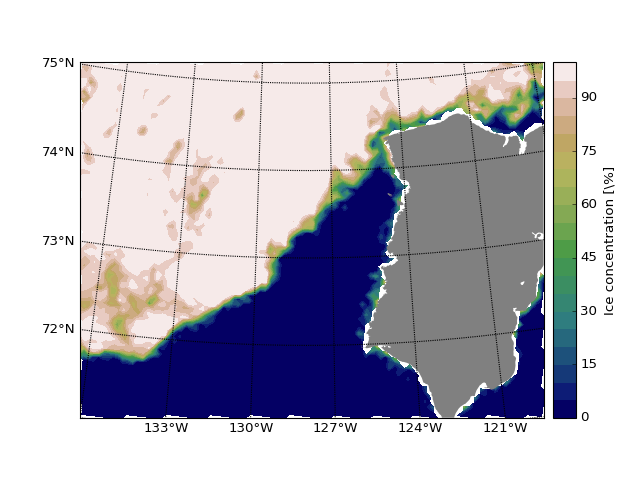

In [11]:
plt_amsr_zoom()

## Load C130 nav data

In [24]:
fnav = fp+'c130/ARISE-C130-Hskping_c130_20140919_R1.ict'
nav,nav_header = lm.load_ict(fnav,return_header=True)

('Start_UTC', 'Day_Of_Year', 'Latitude', 'Longitude', 'GPS_Altitude', 'Pressure_Altitude', 'Ground_Speed', 'True_Air_Speed', 'Indicated_Air_Speed', 'Mach_Number', 'Vertical_Speed', 'True_Heading', 'Track_Angle', 'Drift_Angle', 'Pitch_Angle', 'Roll_Angle', 'Static_Air_Temp', 'Potential_Temp', 'Dew_Point', 'Total_Air_Temp', 'IR_Surf_Temp', 'Static_Pressure', 'Cabin_Pressure', 'Wind_Speed', 'Wind_Direction', 'Solar_Zenith_Angle', 'Aircraft_Sun_Elevation', 'Sun_Azimuth', 'Aircraft_Sun_Azimuth', 'Mixing_Ratio', 'Part_Press_Water_Vapor', 'Sat_Vapor_Press_H2O', 'Sat_Vapor_Press_Ice', 'Relative_Humidity')


In [25]:
nav_header

['66,1001\r\n',
 'Project Office\r\n',
 'NSERC - National Suborbital Education and Research Center\r\n',
 'C-130 (N439NA) Data Acquisition and Distribution\r\n',
 'ARISE 2014\r\n',
 '1,1\r\n',
 '2014,09,19,2015,12,01\r\n',
 '1\r\n',
 'Start_UTC,seconds\r\n',
 '33\r\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\r\n',
 '-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999\r\n',
 'Day_Of_Year,\r\n',
 'Latitude, deg\r\n',
 'Longitude, deg            \r\n',
 'GPS_Altitude, m         \r\n',
 'Pressure_Altitude, ft      \r\n',
 'Ground_Speed, m/s           \r\n',
 'True_Air_Speed, kts       \r\n',
 'Indicated_Air_Speed, kts   \r\n',
 'Mach_Number, mach         \r\n',
 'Vertical_Speed, m/s       \r\n',
 'True_Heading, deg (0-360)         \r\n',
 'Track_Angle, deg (0-360)            \r\n',
 'Drift_Angle, deg            \r\n',


In [26]:
nav['Longitude'][nav['Longitude']==0.0] = np.NaN
nav['Latitude'][nav['Latitude']<0.0] = np.NaN

In [27]:
flt = np.where((nav['Start_UTC']>19.0) & (nav['Start_UTC']<23.0) & (nav['Longitude']<0.0))[0]

### Plots of nav data

<IPython.core.display.Javascript object>


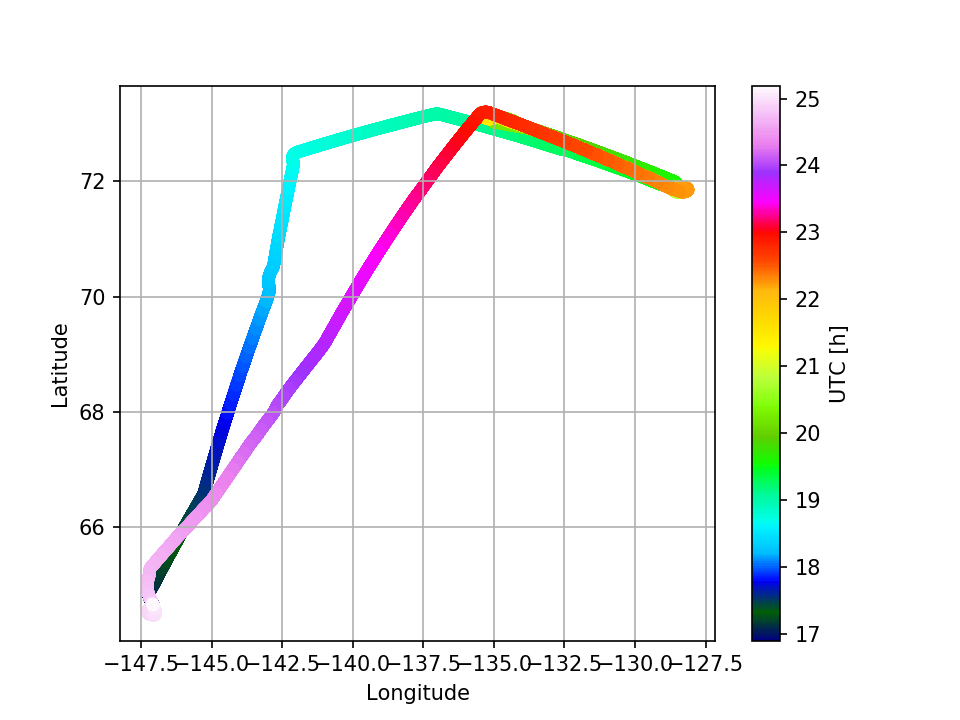

In [28]:
plt.figure()
#plt.plot(nav['Longitude'],nav['Latitude'])
ss = plt.scatter(nav['Longitude'],nav['Latitude'],c=nav['Start_UTC'],edgecolor='None',cmap=plt.cm.gist_ncar)
plt.grid()
cbar = plt.colorbar(ss)
cbar.set_label('UTC [h]')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.savefig(fp+'plots_v2/20140919_flightpath.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


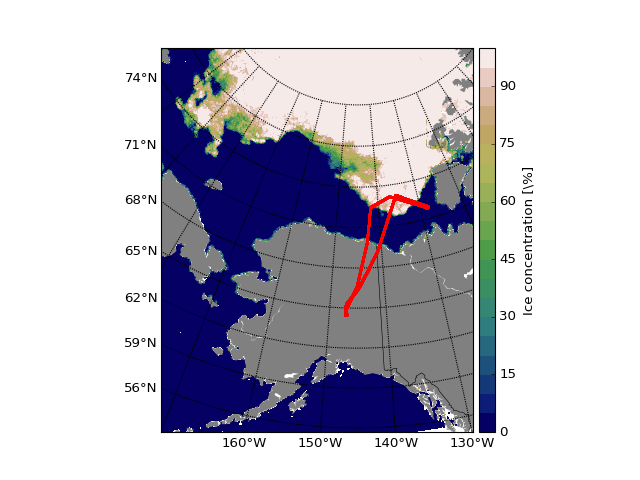

In [15]:
m = plt_amsr()
m.scatter(nav['Longitude'],nav['Latitude'],latlon=True,zorder=10,s=0.5,edgecolor='r')
plt.savefig(fp+'plots_v2/20140919_map_ice_conc.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


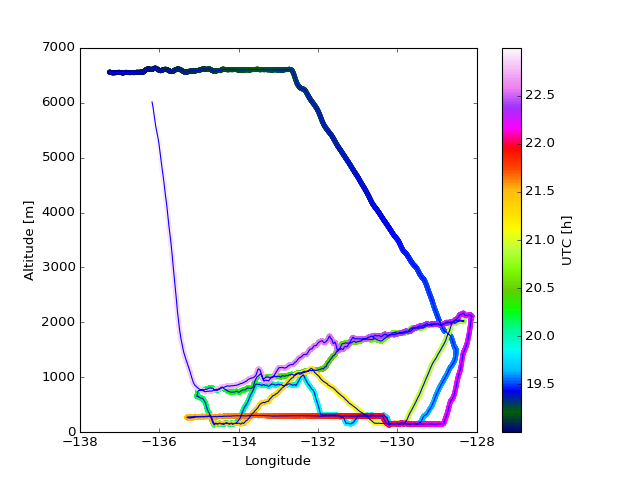

In [19]:
plt.figure()
plt.plot(nav['Longitude'][flt],nav['GPS_Altitude'][flt])
plt.xlabel('Longitude')
plt.ylabel('Altitude [m]')
plt.ylim([0,7000])
plt.xlim([-138,-128])
ss = plt.scatter(nav['Longitude'][flt],nav['GPS_Altitude'][flt],c=nav['Start_UTC'][flt],edgecolor='None',cmap=cm.gist_ncar)
cbar = plt.colorbar(ss)
cbar.set_label('UTC [h]')
plt.savefig(fp+'plots_v2/20140919_proile_alt.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


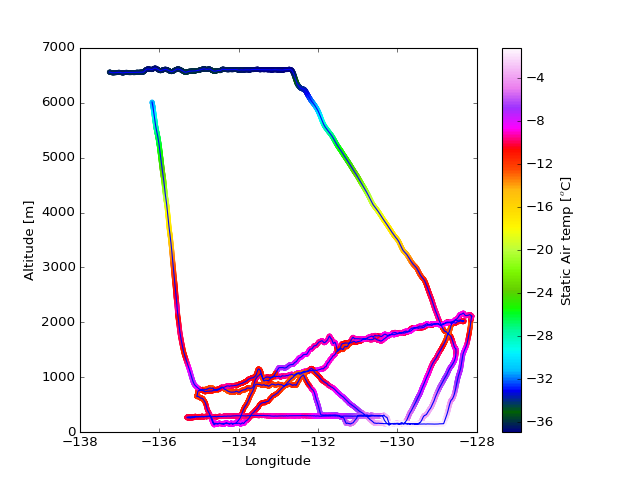

In [20]:
plt.figure()
plt.plot(nav['Longitude'][flt],nav['GPS_Altitude'][flt])
plt.xlabel('Longitude')
plt.ylabel('Altitude [m]')
plt.ylim([0,7000])
plt.xlim([-138,-128])
ss = plt.scatter(nav['Longitude'][flt],nav['GPS_Altitude'][flt],c=nav['Static_Air_Temp'][flt],edgecolor='None',cmap=cm.gist_ncar)
cbar = plt.colorbar(ss)
cbar.set_label('Static Air temp [$^{o}$C]')
plt.savefig(fp+'plots_v2/20140919_proile_alt_temp.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


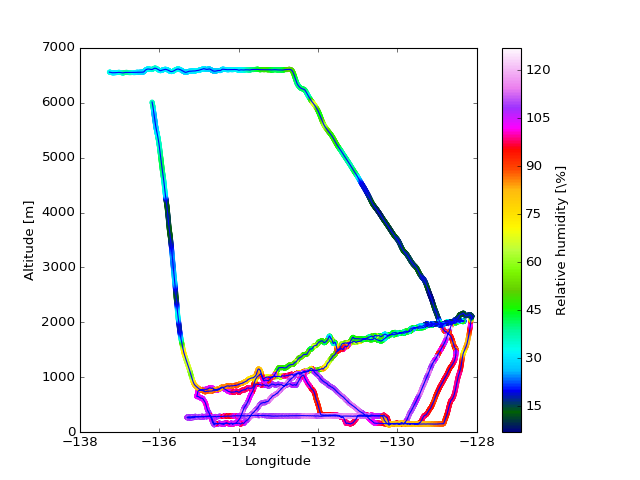

In [21]:
plt.figure()
plt.plot(nav['Longitude'][flt],nav['GPS_Altitude'][flt])
plt.xlabel('Longitude')
plt.ylabel('Altitude [m]')
plt.ylim([0,7000])
plt.xlim([-138,-128])
ss = plt.scatter(nav['Longitude'][flt],nav['GPS_Altitude'][flt],c=nav['Relative_Humidity'][flt],edgecolor='None',cmap=cm.gist_ncar)
cbar = plt.colorbar(ss)
cbar.set_label('Relative humidity [\\%]')
plt.savefig(fp+'plots_v2/20140919_proile_alt_RH.png',dpi=600,transparent=True)

## Load Cloud probe data

In [14]:
fprobe = fp+'c130/ARISE-LARGE-PROBES_C130_20140919_R2.ict'
probe,prb_header = lm.load_ict(fprobe,return_header=True)

('UTC_mid', 'Latitude_deg', 'Longitude_deg', 'PressAlt_ft', 'TWC_gm3', 'LWC1_gm3', 'LWC2_gm3', 'nCDP_cm3', 'vCDP_um3cm3', 'CDP01_dNdlogD', 'CDP02_dNdlogD', 'CDP03_dNdlogD', 'CDP04_dNdlogD', 'CDP05_dNdlogD', 'CDP06_dNdlogD', 'CDP07_dNdlogD', 'CDP08_dNdlogD', 'CDP09_dNdlogD', 'CDP10_dNdlogD', 'CDP11_dNdlogD', 'CDP12_dNdlogD', 'CDP13_dNdlogD', 'CDP14_dNdlogD', 'CDP15_dNdlogD', 'CDP16_dNdlogD', 'CDP17_dNdlogD', 'CDP18_dNdlogD', 'CDP19_dNdlogD', 'CDP20_dNdlogD', 'CDP21_dNdlogD', 'CDP22_dNdlogD', 'CDP23_dNdlogD', 'CDP24_dNdlogD', 'CDP25_dNdlogD', 'CDP26_dNdlogD', 'CDP27_dNdlogD', 'CDP28_dNdlogD', 'CDP29_dNdlogD', 'CDP30_dNdlogD')


In [16]:
prb_header

['83,1001\n',
 'Anderson, Bruce E.\n',
 'NASA Langley\n',
 'In-situ aerosol measurements from the NASA C-130\n',
 'ARISE\n',
 '1,1\n',
 '2014,09,19,2015,10,26\n',
 '1.0\n',
 'UTC_mid,Secs after midnight,Time of acquisition\n',
 '38\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\n',
 '-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999,-999999\n',
 'Latitude_deg,deg,GPS Latitude\n',
 'Longitude_deg,deg,GPS Longitude\n',
 'PressAlt_ft,ft,Pressure Altitude\n',
 'TWC_gm-3, gm-3, Total Water Content from the WCM-200\n',
 'LWC1_gm-3, gm-3, Liquid Water Content from the WCM-200\n',
 'LWC2_gm-3, gm-3, Liquid Water Content from the WCM-200\n',
 'nCDP_cm-3,cm-3,Integrated Number Concentration from the DMT Cloud Droplet Pr

To Note from Lee Thornhill about this version of the archived data, received (2015-05-27 5:03 am PST):

The CDP size distributions are in dN, not dlogD. I make a mistake on that label. Usually I put size distributions into the archive as dNdlogD, but I missed a step in doing that. I will correct that with the next archive file update. 

In [15]:
flt_prb = np.where((probe['UTC_mid']>19.0) & (probe['UTC_mid']<23.0))
probe['TWC_gm3'][probe['TWC_gm3']<0.0] = np.NaN
feet2meter = 0.3048

plotting of drop size distribution

In [16]:
bin_diameters = np.array([3,4,5,6,7,8,9,10,11,12,13,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50])

In [17]:
nd_dist = np.vstack((probe['CDP01_dNdlogD'],probe['CDP02_dNdlogD'],probe['CDP03_dNdlogD'],
                     probe['CDP04_dNdlogD'],probe['CDP05_dNdlogD'],probe['CDP06_dNdlogD'],
                     probe['CDP07_dNdlogD'],probe['CDP08_dNdlogD'],probe['CDP09_dNdlogD'],
                     probe['CDP10_dNdlogD'],probe['CDP11_dNdlogD'],probe['CDP12_dNdlogD'],
                     probe['CDP13_dNdlogD'],probe['CDP14_dNdlogD'],probe['CDP15_dNdlogD'],
                     probe['CDP16_dNdlogD'],probe['CDP17_dNdlogD'],probe['CDP18_dNdlogD'],
                     probe['CDP19_dNdlogD'],probe['CDP20_dNdlogD'],probe['CDP21_dNdlogD'],
                     probe['CDP22_dNdlogD'],probe['CDP23_dNdlogD'],probe['CDP24_dNdlogD'],
                     probe['CDP25_dNdlogD'],probe['CDP26_dNdlogD'],probe['CDP27_dNdlogD'],
                     probe['CDP28_dNdlogD'],probe['CDP29_dNdlogD'],probe['CDP30_dNdlogD']))

In [18]:
nd_dist[nd_dist<0.5] = np.nan

### Plots of cloud drops

<IPython.core.display.Javascript object>


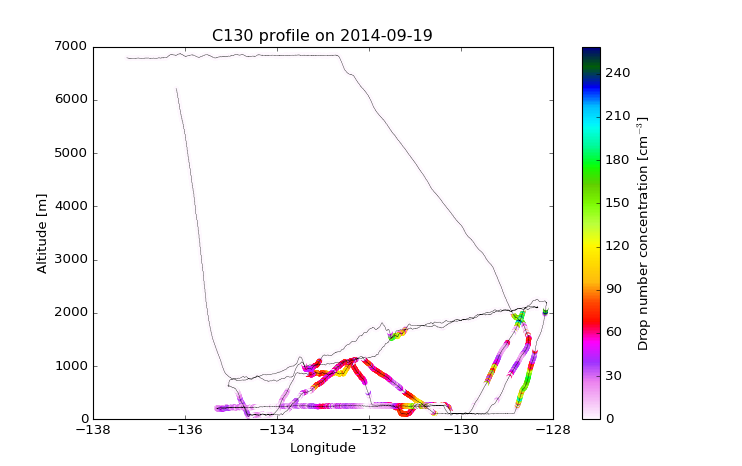

In [26]:
plt.figure()
#plt.plot(nav['Longitude'][flt],nav['GPS_Altitude'][flt])
plt.xlabel('Longitude')
plt.ylabel('Altitude [m]')
ss = plt.scatter(probe['Longitude_deg'][flt_prb],probe['PressAlt_ft'][flt_prb]*feet2meter,
                 c=probe['nCDP_cm3'][flt_prb],edgecolor='None',
                 cmap=cm.gist_ncar_r)
plt.plot(probe['Longitude_deg'][flt_prb],probe['PressAlt_ft'][flt_prb]*feet2meter,c='k',linewidth=0.3)
plt.ylim([0,7000])
plt.xlim([-138,-128])
plt.title('C130 profile on 2014-09-19')
cbar = plt.colorbar(ss)
cbar.set_label('Drop number concentration [cm$^{-3}$]')
plt.savefig(fp+'plots_v2/20140919_proile_alt_ndrop.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


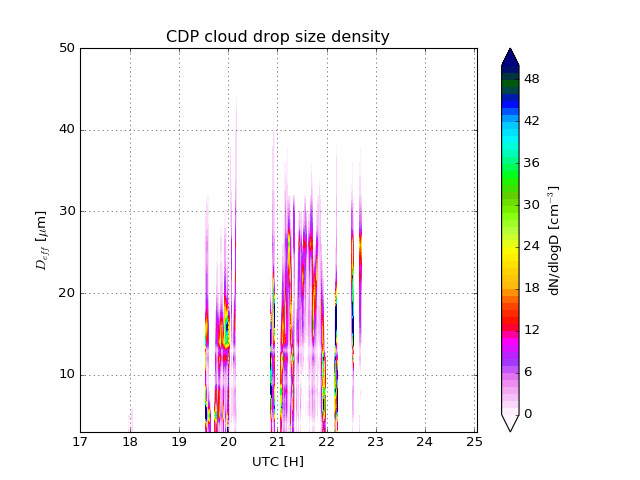

In [31]:
clevels = np.arange(0,51)
vv = plt.contourf(probe['UTC_mid'],bin_diameters,nd_dist,clevels,cmap=plt.cm.gist_ncar_r,extend='both')
cbar = plt.colorbar(vv)
cbar.set_label('dN/dlogD [cm$^{-3}$]')
plt.xlabel('UTC [H]')
plt.ylabel('$D_{eff}$ [$\\mu$m]')
plt.title('CDP cloud drop size density')
plt.grid()
plt.savefig(fp+'plots_v2/20140919_utc_dndlogd.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


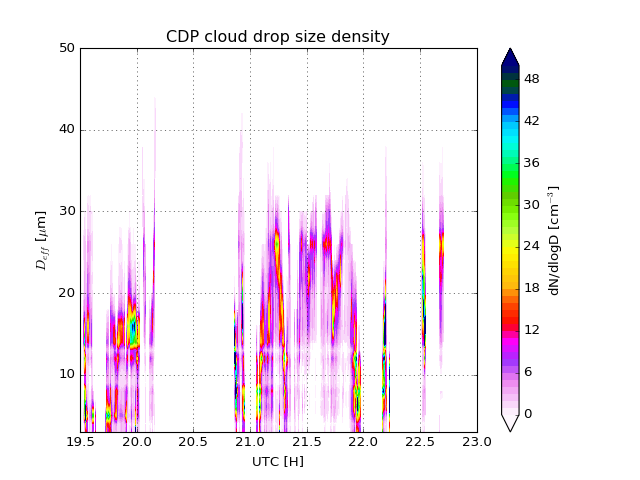

In [32]:
clevels = np.arange(0,51)
vv = plt.contourf(probe['UTC_mid'],bin_diameters,nd_dist,clevels,cmap=plt.cm.gist_ncar_r,extend='both')
cbar = plt.colorbar(vv)
cbar.set_label('dN/dlogD [cm$^{-3}$]')
plt.xlabel('UTC [H]')
plt.ylabel('$D_{eff}$ [$\\mu$m]')
plt.title('CDP cloud drop size density')
plt.xlim([19.5,23])
plt.grid()
plt.savefig(fp+'plots_v2/20140919_utc_dndlogd_zoom.png',dpi=600,transparent=True)

## Load the SSFR data

In [22]:
sh = h5py.File(fp+'c130/ARISE-SSFR_C130_20140919_R1.h5','r')

In [23]:
ssfr = {}
for key in sh.keys():
    print(key)
    ssfr[key] = sh[key][:]

_000_readme
nadlambda
nbb
nspectra
utc
zbb
zenlambda
zspectra


In [24]:
sh.close()

In [25]:
ssfr.keys()

[u'utc',
 u'zbb',
 u'zenlambda',
 u'nadlambda',
 u'nspectra',
 u'_000_readme',
 u'zspectra',
 u'nbb']

In [26]:
fn = interp1d(ssfr['nadlambda'],ssfr['nspectra'],axis=1,bounds_error=False)
ssfr['nnspectra'] = fn(ssfr['zenlambda'])

In [27]:
wvl = np.arange(350,1701)

In [28]:
ssfr['nspectra1'] = fn(wvl)

In [29]:
fz = interp1d(ssfr['zenlambda'],ssfr['zspectra'],axis=1,bounds_error=False)
ssfr['zspectra1'] = fz(wvl)

In [30]:
alb = ssfr['nspectra1']/ssfr['zspectra1']
alb[alb<=0.0] = 0.0
alb[alb>=1.0] = 1.0
alb[np.isnan(alb)] = 0.0

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
alb.shape

(6032, 1351)

In [32]:
ssfr['utc'].shape

(6032,)

In [33]:
ssfr_flt = np.where((ssfr['utc']>19.0) & (ssfr['utc']<23.0))[0]

In [34]:
ssfr_flt.shape

(2880,)

In [36]:
alb[:,150].shape

(6032,)

In [43]:
any(np.isnan(alb[:,150]))

False

<IPython.core.display.Javascript object>


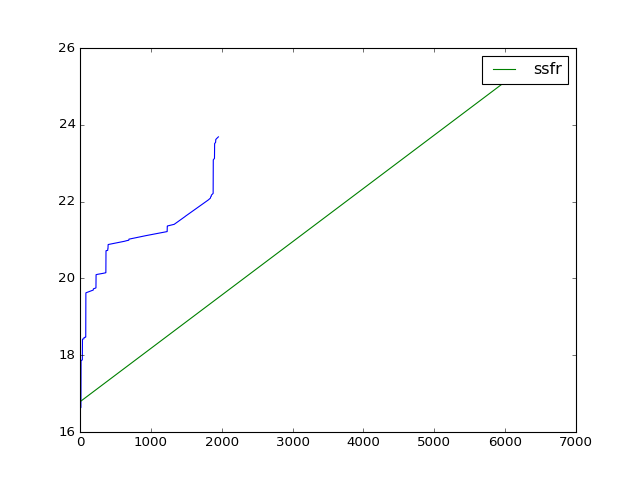

In [164]:
plt.figure()
plt.plot(sps['utc'])
plt.plot(ssfr['utc'],label='ssfr')
plt.legend()

<IPython.core.display.Javascript object>


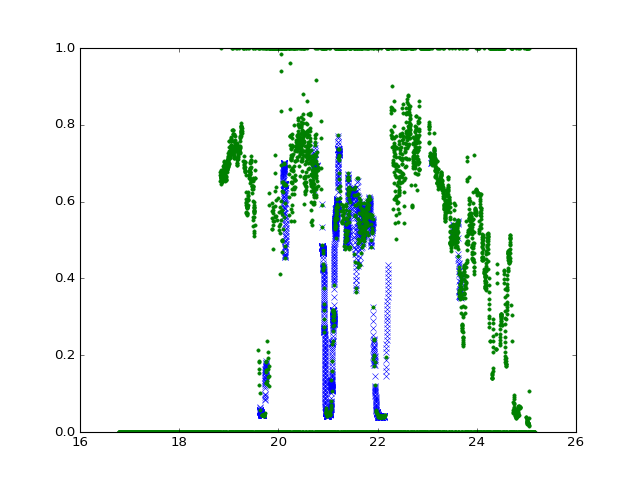

In [174]:
plt.figure()
plt.plot(sps['utc'],alb_500,'x')
plt.plot(ssfr['utc'],alb[:,150],'.')

# Start more detailed analysis

## Convert the drop size distribution to $r_{eff}$

Trying to replicate the $r_{eff}$ equation:

$$r_{eff}=\frac{\int^{\infty}_{0}Q_{ext}(r)r^{3}n(r)dr}{\int^{\infty}_{0}Q_{ext}(r)r^{2}n(r)dr}$$


With $Q_{ext}(r)$ representing the extinction efficiency, $r$ the radius of the particle, $n(r)$ the drop size distribution

Load $Q_{ext}(r)$ for mie

For now use Q_ext = parameterized values with exponenetial decrease determined from Mie_Calc ipython notebook for lambda at 1.70 $\mu$m 

In [37]:
nd_dist.shape

(30, 29020)

In [38]:
nd_dist[:,1000]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

In [44]:
def calc_ref(nd,diameter):
    " calculate the effective radius using trapezoid integration rule "
    nda,ndi = nanmasked(nd)
    popt = [ 0.87495122 ,0.22795525 ,2.08105225] # from Mie_Calc.py
    def qext(x, a, c, d):
        return a*np.exp(-c*x)+d
    if not any(ndi):
        re = np.NaN
    else:
        re = np.trapz(qext(diameter[ndi]/2.0,*popt)*(diameter[ndi]/2.0)**3.0*nda)/ \
            np.trapz(qext(diameter[ndi]/2.0,*popt)*(diameter[ndi]/2.0)**2.0*nda)
    return re

In [45]:
print calc_ref(nd_dist[:,14000],bin_diameters)

5.721650492520953


In [46]:
ref = np.zeros(len(nd_dist[0,:]))
for i in xrange(len(nd_dist[0,:])):
    ref[i] = calc_ref(nd_dist[:,i],bin_diameters)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [47]:
probe_ref = Sp.smooth(ref,10,nan=False,old=True)

### Plots some $r_{eff}$ 

<IPython.core.display.Javascript object>


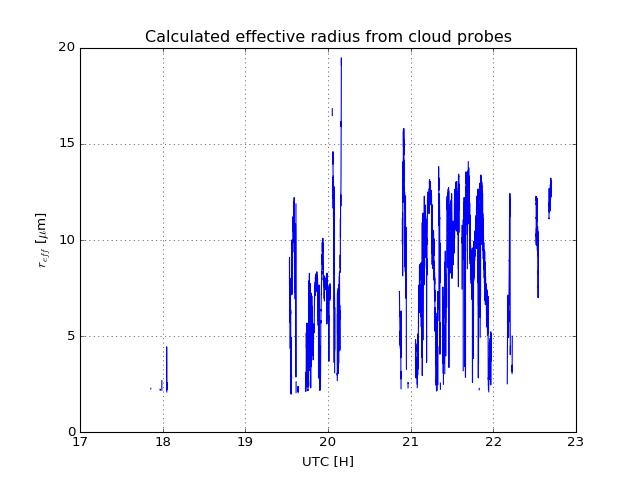

In [38]:
plt.plot(probe['UTC_mid'],ref)
plt.title('Calculated effective radius from cloud probes')
plt.xlabel('UTC [H]')
plt.ylabel('$r_{eff}$ [$\\mu$m]')
plt.grid()
plt.savefig(fp+'plots_v2/20140919_utc_probes_ref.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


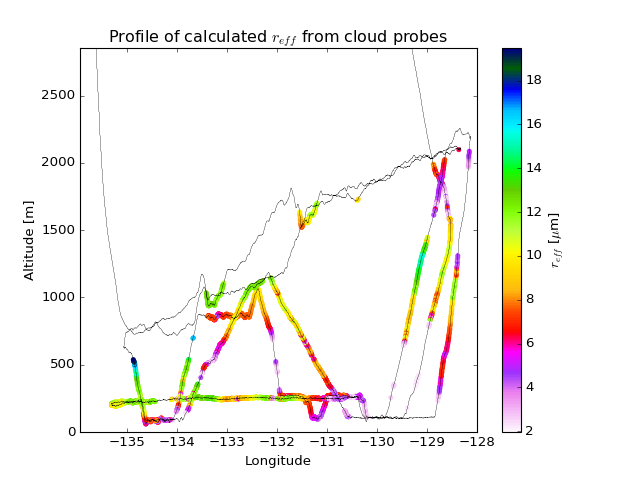

In [153]:
plt.figure()
#plt.plot(nav['Longitude'][flt],nav['GPS_Altitude'][flt])
plt.xlabel('Longitude')
plt.ylabel('Altitude [m]')
ss = plt.scatter(probe['Longitude_deg'][flt_prb],probe['PressAlt_ft'][flt_prb]*feet2meter,
                 c=ref[flt_prb],edgecolor='None',
                 cmap=cm.gist_ncar_r)
plt.plot(probe['Longitude_deg'][flt_prb],probe['PressAlt_ft'][flt_prb]*feet2meter,c='k',linewidth=0.3)
plt.ylim([0,7000])
plt.xlim([-138,-128])
plt.title('Profile of calculated $r_{eff}$ from cloud probes')
cbar = plt.colorbar(ss)
cbar.set_label('$r_{eff}$ [$\\mu$m]')
plt.savefig(fp+'plots_v2/20140919_profile_alt_ref_calc.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


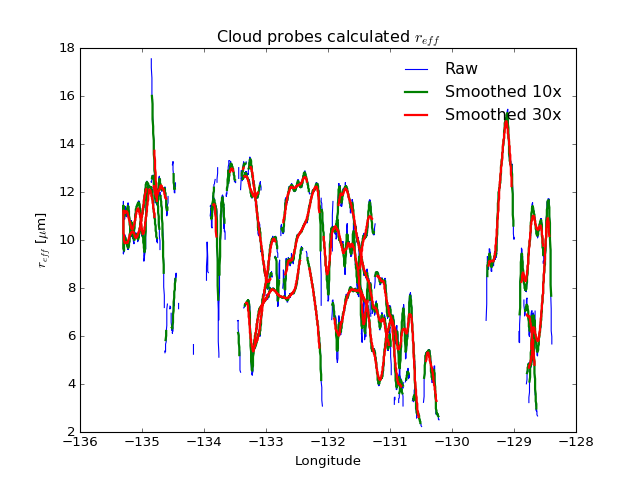

In [44]:
plt.figure()
plt.plot(probe['Longitude_deg'][flt_prb],probe_ref[flt_prb],label='Raw')
plt.plot(probe['Longitude_deg'][flt_prb],Sp.smooth(probe_ref[flt_prb],10,nan=False,old=True),label='Smoothed 10x',linewidth=2)
plt.plot(probe['Longitude_deg'][flt_prb],Sp.smooth(probe_ref[flt_prb],30,nan=False,old=True),label='Smoothed 30x',linewidth=2)
plt.title('Cloud probes calculated $r_{eff}$')
plt.xlabel('Longitude')
plt.ylabel('$r_{eff}$ [$\\mu$m]')
plt.legend(frameon=False)
plt.savefig(fp+'plots_v2/20140919_lon_ref_calc.png',dpi=600,transparent=True)

# Load other retrieved and radiative properties

## Load the MODIS cloud properties

Get the data from MODIS for the proper day of year

In [48]:
from datetime import datetime
datetime(2014,9,19).timetuple().tm_yday

262

In [49]:
fmodis_aqua = fp+'MODIS/MYD06_L2.A2014262.1955.006.2014282222048.hdf'
fmodis_aqua_geo = fp+'MODIS/MYD03.A2014262.1955.006.2014272205731.hdf'
fmodis_terra = fp+'MODIS/MOD06_L2.A2014262.2115.006.2015077072247.hdf'
fmodis_terra_geo = fp+'MODIS/MOD03.A2014262.2115.006.2014272205802.hdf'
fviirs = fp+'' #not yet

In [50]:
aqua,aqua_dicts = lm.load_modis(fmodis_aqua_geo,fmodis_aqua)

Outputting the Geo subdatasets:
0: [4060x2708] Scan Offset MODIS_Swath_Type_GEO (8-bit integer)
1: [4060x2708] Track Offset MODIS_Swath_Type_GEO (8-bit integer)
2: [4060x2708] Height Offset MODIS_Swath_Type_GEO (8-bit integer)
3: [2030x1354] Height MODIS_Swath_Type_GEO (16-bit integer)
4: [2030x1354] SensorZenith MODIS_Swath_Type_GEO (16-bit integer)
5: [2030x1354] SensorAzimuth MODIS_Swath_Type_GEO (16-bit integer)
6: [2030x1354] Range MODIS_Swath_Type_GEO (16-bit unsigned integer)
7: [2030x1354] SolarZenith MODIS_Swath_Type_GEO (16-bit integer)
8: [2030x1354] SolarAzimuth MODIS_Swath_Type_GEO (16-bit integer)
9: [2030x1354] Land/SeaMask MODIS_Swath_Type_GEO (8-bit unsigned integer)
10: [2030x1354] WaterPresent MODIS_Swath_Type_GEO (8-bit unsigned integer)
11: [2030x1354] gflags MODIS_Swath_Type_GEO (8-bit unsigned integer)
12: [2030x1354] Latitude (32-bit floating-point)
13: [2030x1354] Longitude (32-bit floating-point)
14: [4060x2708] Scan Offset (8-bit integer)
15: [4060x2708] Trac

113: [12x7] Single_Scatter_Albedo_Ice mod06 (32-bit floating-point)
114: [18x7] Extinction_Efficiency_Liq mod06 (32-bit floating-point)
115: [18x7] Asymmetry_Parameter_Liq mod06 (32-bit floating-point)
116: [18x7] Single_Scatter_Albedo_Liq mod06 (32-bit floating-point)
117: [2030x1354x2] Cloud_Mask_SPI mod06 (16-bit integer)
118: [2030x1354x3] Retrieval_Failure_Metric mod06 (16-bit integer)
119: [2030x1354x3] Retrieval_Failure_Metric_16 mod06 (16-bit integer)
120: [2030x1354x3] Retrieval_Failure_Metric_37 mod06 (16-bit integer)
121: [2030x1354x3] Retrieval_Failure_Metric_1621 mod06 (16-bit integer)
122: [2030x1354x6] Atm_Corr_Refl mod06 (16-bit integer)
123: [2030x1354x9] Quality_Assurance_1km mod06 (8-bit integer)
124: [406x270] Latitude (32-bit floating-point)
125: [406x270] Longitude (32-bit floating-point)
126: [406x270] Scan_Start_Time (64-bit floating-point)
127: [406x270] Solar_Zenith (16-bit integer)
128: [406x270] Solar_Zenith_Day (16-bit integer)
129: [406x270] Solar_Zenith_N

In [51]:
terra,terra_dicts = lm.load_modis(fmodis_terra_geo,fmodis_terra)

Outputting the Geo subdatasets:
0: [4060x2708] Scan Offset MODIS_Swath_Type_GEO (8-bit integer)
1: [4060x2708] Track Offset MODIS_Swath_Type_GEO (8-bit integer)
2: [4060x2708] Height Offset MODIS_Swath_Type_GEO (8-bit integer)
3: [2030x1354] Height MODIS_Swath_Type_GEO (16-bit integer)
4: [2030x1354] SensorZenith MODIS_Swath_Type_GEO (16-bit integer)
5: [2030x1354] SensorAzimuth MODIS_Swath_Type_GEO (16-bit integer)
6: [2030x1354] Range MODIS_Swath_Type_GEO (16-bit unsigned integer)
7: [2030x1354] SolarZenith MODIS_Swath_Type_GEO (16-bit integer)
8: [2030x1354] SolarAzimuth MODIS_Swath_Type_GEO (16-bit integer)
9: [2030x1354] Land/SeaMask MODIS_Swath_Type_GEO (8-bit unsigned integer)
10: [2030x1354] WaterPresent MODIS_Swath_Type_GEO (8-bit unsigned integer)
11: [2030x1354] gflags MODIS_Swath_Type_GEO (8-bit unsigned integer)
12: [2030x1354] Latitude (32-bit floating-point)
13: [2030x1354] Longitude (32-bit floating-point)
14: [4060x2708] Scan Offset (8-bit integer)
15: [4060x2708] Trac

112: [12x7] Asymmetry_Parameter_Ice mod06 (32-bit floating-point)
113: [12x7] Single_Scatter_Albedo_Ice mod06 (32-bit floating-point)
114: [18x7] Extinction_Efficiency_Liq mod06 (32-bit floating-point)
115: [18x7] Asymmetry_Parameter_Liq mod06 (32-bit floating-point)
116: [18x7] Single_Scatter_Albedo_Liq mod06 (32-bit floating-point)
117: [2030x1354x2] Cloud_Mask_SPI mod06 (16-bit integer)
118: [2030x1354x3] Retrieval_Failure_Metric mod06 (16-bit integer)
119: [2030x1354x3] Retrieval_Failure_Metric_16 mod06 (16-bit integer)
120: [2030x1354x3] Retrieval_Failure_Metric_37 mod06 (16-bit integer)
121: [2030x1354x3] Retrieval_Failure_Metric_1621 mod06 (16-bit integer)
122: [2030x1354x6] Atm_Corr_Refl mod06 (16-bit integer)
123: [2030x1354x9] Quality_Assurance_1km mod06 (8-bit integer)
124: [406x270] Latitude (32-bit floating-point)
125: [406x270] Longitude (32-bit floating-point)
126: [406x270] Scan_Start_Time (64-bit floating-point)
127: [406x270] Solar_Zenith (16-bit integer)
128: [406x27

In [48]:
terra_dicts['tau']

{'ALGORITHMPACKAGEACCEPTANCEDATE': 'June 1997',
 'ALGORITHMPACKAGEMATURITYCODE': 'at-launch',
 'ALGORITHMPACKAGENAME': 'ATBD-MOD-04 and ATBD-MOD-05',
 'ALGORITHMPACKAGEVERSION': '2',
 'ALGORITHM_VERSION_CLOUD_PHASE_IR': '1',
 'ALGORITHM_VERSION_CLOUD_PROPERTY_VIS': '1',
 'ALGORITHM_VERSION_CLOUD_TOP_PROPERTY_IR': '1',
 'ANCILLARYINPUTPOINTER': 'MOD03.A2014262.2115.006.2014272205802.hdf',
 'ANCILLARYINPUTTYPE': 'Geolocation',
 'ASSOCIATEDINSTRUMENTSHORTNAME': 'MODIS',
 'ASSOCIATEDPLATFORMSHORTNAME': 'Terra',
 'ASSOCIATEDSENSORSHORTNAME': 'MODIS',
 'AUTOMATICQUALITYFLAG': 'Passed',
 'AUTOMATICQUALITYFLAGEXPLANATION': 'Passed: >10% useable; Failed: <10% useable',
 'Cell_Across_Swath_Sampling': '1, 1354, 1',
 'Cell_Along_Swath_Sampling': '1, 2030, 1',
 'CirrusCloudDetectedPct_IR': '   30.29',
 'Clear_Sky_Restoral_Status': 'y',
 'CloudPhaseUncertainPct_IR': '   54.48',
 'Collection_4_Phase_Used': 'n',
 'DAYNIGHTFLAG': 'Day',
 'DESCRREVISION': '6.0',
 'EASTBOUNDINGCOORDINATE': '-103.59909772

### Plot out some MODIS cloud maps

In [52]:
flt_aqua = np.where(nav['Start_UTC']<19.9)

In [53]:
flt_terra = np.where(nav['Start_UTC']<21.25)

<IPython.core.display.Javascript object>


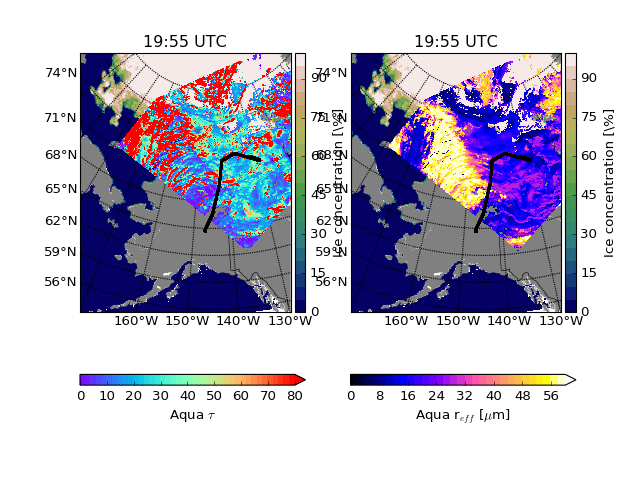

In [53]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
m = plt_amsr(ax=ax1)
clevels = np.linspace(0,80,41)
cc = m.contourf(aqua['lon'],aqua['lat'],aqua['tau'],clevels,latlon=True,cmap=plt.cm.rainbow,extend='max',zorder=10)
cbar = plt.colorbar(cc,orientation='horizontal')
cbar.set_label('Aqua $\\tau$')
m.scatter(nav['Longitude'][flt_aqua],nav['Latitude'][flt_aqua],latlon=True,zorder=10,s=0.5,edgecolor='k')
plt.title('19:55 UTC')

ax2 = fig.add_subplot(1,2,2)
m2 = plt_amsr(ax=ax2)
clevels2 = np.linspace(0,60,31)
cc = m2.contourf(aqua['lon'],aqua['lat'],aqua['ref'],clevels2,latlon=True,cmap=plt.cm.gnuplot2,extend='max',zorder=10)
cbar = plt.colorbar(cc,orientation='horizontal')
cbar.set_label('Aqua r$_{eff}$ [$\\mu$m]')
m2.scatter(nav['Longitude'][flt_aqua],nav['Latitude'][flt_aqua],latlon=True,zorder=10,s=0.5,edgecolor='k')
plt.title('19:55 UTC')

plt.savefig(fp+'plots_v2/20140919_map_aqua.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


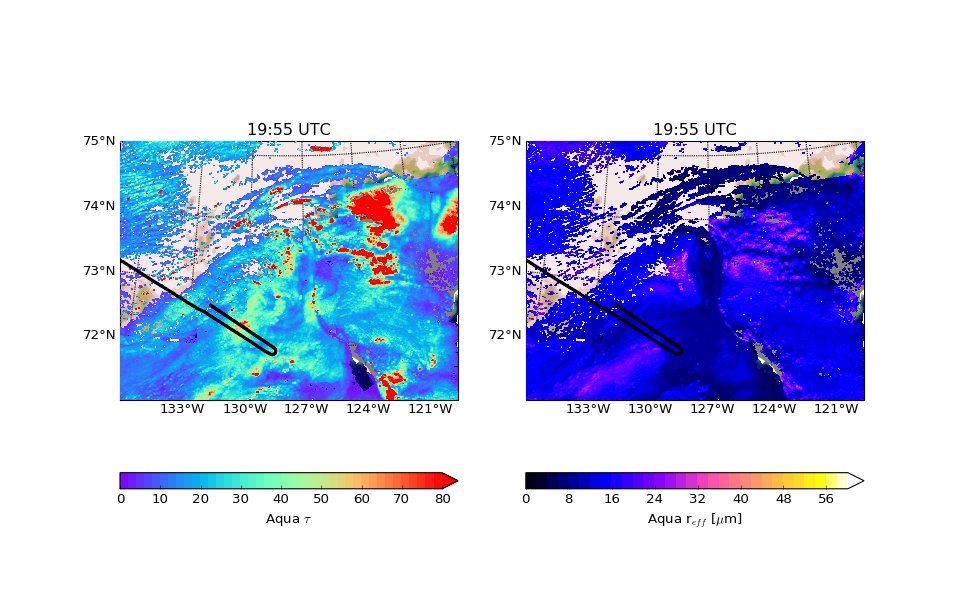

In [54]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
m = plt_amsr_zoom(ax=ax1,colorbar=False)
clevels = np.linspace(0,80,41)
cc = m.contourf(aqua['lon'],aqua['lat'],aqua['tau'],clevels,latlon=True,cmap=plt.cm.rainbow,extend='max',zorder=10)
cbar = plt.colorbar(cc,orientation='horizontal')
cbar.set_label('Aqua $\\tau$')
m.scatter(nav['Longitude'][flt_aqua],nav['Latitude'][flt_aqua],latlon=True,zorder=10,s=0.5,edgecolor='k')
plt.title('19:55 UTC')

ax2 = fig.add_subplot(1,2,2)
m2 = plt_amsr_zoom(ax=ax2,colorbar=False)
clevels2 = np.linspace(0,60,31)
cc = m2.contourf(aqua['lon'],aqua['lat'],aqua['ref'],clevels2,latlon=True,cmap=plt.cm.gnuplot2,extend='max',zorder=10)
cbar = plt.colorbar(cc,orientation='horizontal')
cbar.set_label('Aqua r$_{eff}$ [$\\mu$m]')
m2.scatter(nav['Longitude'][flt_aqua],nav['Latitude'][flt_aqua],latlon=True,zorder=10,s=0.5,edgecolor='k')
plt.title('19:55 UTC')

plt.savefig(fp+'plots_v2/20140919_map_zoom_aqua.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


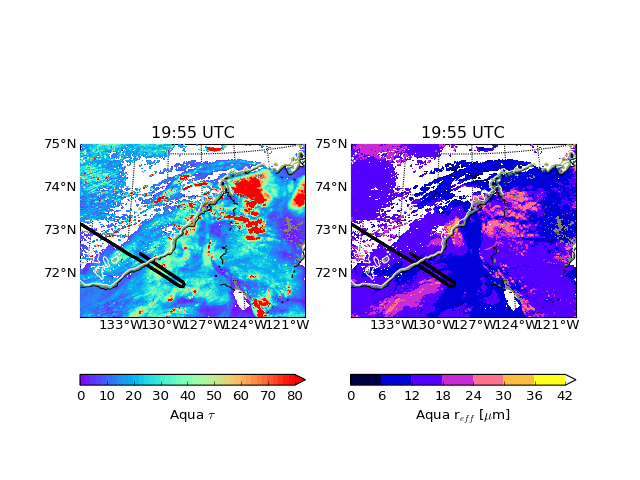

In [211]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
m = plt_amsr_cnt_zoom(ax=ax1)
clevels = np.linspace(0,80,41)
cc = m.contourf(aqua['lon'],aqua['lat'],aqua['tau'],clevels,latlon=True,cmap=plt.cm.rainbow,extend='max',zorder=10)
cbar = plt.colorbar(cc,orientation='horizontal')
cbar.set_label('Aqua $\\tau$')
m.scatter(nav['Longitude'][flt_aqua],nav['Latitude'][flt_aqua],latlon=True,zorder=10,s=0.5,edgecolor='k')
plt.title('19:55 UTC')

ax2 = fig.add_subplot(1,2,2)
m2 = plt_amsr_cnt_zoom(ax=ax2)
clevels2 = np.linspace(0,60,31)
cc = m2.contourf(aqua['lon'],aqua['lat'],aqua['ref'],6,latlon=True,cmap=plt.cm.gnuplot2,extend='max',zorder=10)
cbar = plt.colorbar(cc,orientation='horizontal')
cbar.set_label('Aqua r$_{eff}$ [$\\mu$m]')
m2.scatter(nav['Longitude'][flt_aqua],nav['Latitude'][flt_aqua],latlon=True,zorder=10,s=0.5,edgecolor='k')
plt.title('19:55 UTC')

<IPython.core.display.Javascript object>


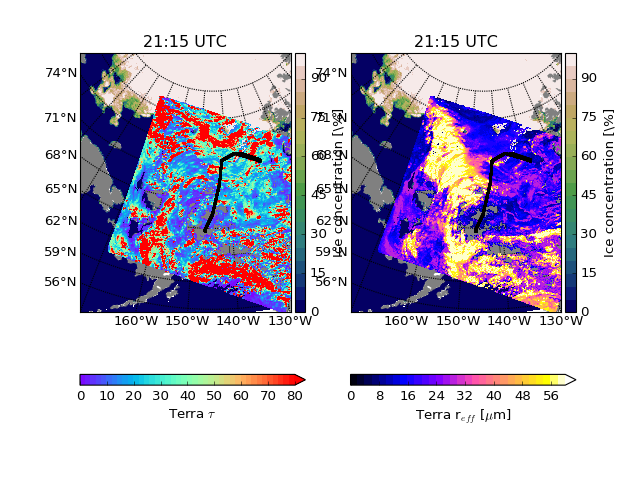

/home/sleblanc/.local/lib/python2.7/site-packages/numpy/ma/core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/sleblanc/.local/lib/python2.7/site-packages/numpy/ma/core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [51]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
m = plt_amsr(ax=ax1)
clevels = np.linspace(0,80,41)
cc = m.contourf(terra['lon'],terra['lat'],terra['tau'],clevels,latlon=True,cmap=plt.cm.rainbow,extend='max',zorder=10)
cbar = plt.colorbar(cc,orientation='horizontal')
cbar.set_label('Terra $\\tau$')
m.scatter(nav['Longitude'][flt_terra],nav['Latitude'][flt_terra],latlon=True,zorder=10,s=0.5,edgecolor='k')
plt.title('21:15 UTC')

ax2 = fig.add_subplot(1,2,2)
m2 = plt_amsr(ax=ax2)
clevels2 = np.linspace(0,60,31)
cc = m2.contourf(terra['lon'],terra['lat'],terra['ref'],clevels2,latlon=True,cmap=plt.cm.gnuplot2,extend='max',zorder=10)
cbar = plt.colorbar(cc,orientation='horizontal')
cbar.set_label('Terra r$_{eff}$ [$\\mu$m]')
m2.scatter(nav['Longitude'][flt_terra],nav['Latitude'][flt_terra],latlon=True,zorder=10,s=0.5,edgecolor='k')
plt.title('21:15 UTC')

plt.savefig(fp+'plots_v2/20140919_map_terra.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


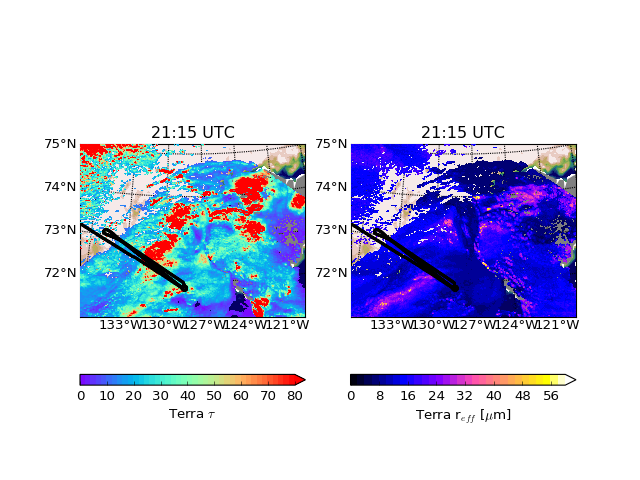

In [57]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
m = plt_amsr_zoom(ax=ax1,colorbar=False)
clevels = np.linspace(0,80,41)
cc = m.contourf(terra['lon'],terra['lat'],terra['tau'],clevels,latlon=True,cmap=plt.cm.rainbow,extend='max',zorder=10)
cbar = plt.colorbar(cc,orientation='horizontal')
cbar.set_label('Terra $\\tau$')
m.scatter(nav['Longitude'][flt_terra],nav['Latitude'][flt_terra],latlon=True,zorder=10,s=0.5,edgecolor='k')
plt.title('21:15 UTC')

ax2 = fig.add_subplot(1,2,2)
m2 = plt_amsr_zoom(ax=ax2,colorbar=False)
clevels2 = np.linspace(0,60,31)
cc = m2.contourf(terra['lon'],terra['lat'],terra['ref'],clevels2,latlon=True,cmap=plt.cm.gnuplot2,extend='max',zorder=10)
cbar = plt.colorbar(cc,orientation='horizontal')
cbar.set_label('Terra r$_{eff}$ [$\\mu$m]')
m2.scatter(nav['Longitude'][flt_terra],nav['Latitude'][flt_terra],latlon=True,zorder=10,s=0.5,edgecolor='k')
plt.title('21:15 UTC')

plt.savefig(fp+'plots_v2/20140919_map_zoom_terra.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


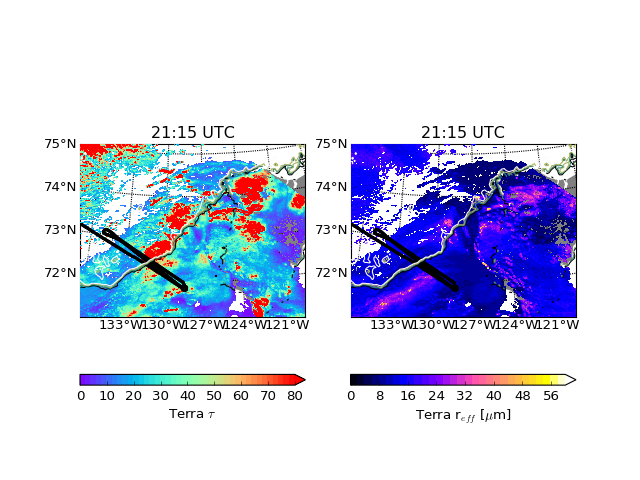

In [197]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
m = plt_amsr_cnt_zoom(ax=ax1)
clevels = np.linspace(0,80,41)
cc = m.contourf(terra['lon'],terra['lat'],terra['tau'],clevels,latlon=True,cmap=plt.cm.rainbow,extend='max',zorder=10)
cbar = plt.colorbar(cc,orientation='horizontal')
cbar.set_label('Terra $\\tau$')
m.scatter(nav['Longitude'][flt_terra],nav['Latitude'][flt_terra],latlon=True,zorder=10,s=0.5,edgecolor='k')
plt.title('21:15 UTC')

ax2 = fig.add_subplot(1,2,2)
m2 = plt_amsr_cnt_zoom(ax=ax2)
clevels2 = np.linspace(0,60,31)
cc = m2.contourf(terra['lon'],terra['lat'],terra['ref'],clevels2,latlon=True,cmap=plt.cm.gnuplot2,extend='max',zorder=10)
cbar = plt.colorbar(cc,orientation='horizontal')
cbar.set_label('Terra r$_{eff}$ [$\\mu$m]')
m2.scatter(nav['Longitude'][flt_terra],nav['Latitude'][flt_terra],latlon=True,zorder=10,s=0.5,edgecolor='k')
plt.title('21:15 UTC')

## Load MERRA Reanalysis

In [54]:
fmerra = fp+'MERRA/MERRA300.prod.assim.inst6_3d_ana_Nv.20140919.SUB.hdf'
merra,merra_dict = lm.load_hdf_sd(fmerra)

Reading file: /mnt/c/Users/sleblanc/Research/ARISE/MERRA/MERRA300.prod.assim.inst6_3d_ana_Nv.20140919.SUB.hdf
/mnt/c/Users/sleblanc/Research/ARISE/MERRA/MERRA300.prod.assim.inst6_3d_ana_Nv.20140919.SUB.hdf 1
print test
  ps: (('time', 'latitude', 'longitude'), (4, 88, 113), 5, 3)
No FillValue on ps
  qv: (('time', 'levels', 'latitude', 'longitude'), (4, 72, 88, 113), 5, 9)
No FillValue on qv
  v: (('time', 'levels', 'latitude', 'longitude'), (4, 72, 88, 113), 5, 8)
No FillValue on v
  longitude: (('longitude',), (113,), 6, 1)
No missing_value on longitude
No FillValue on longitude
  delp: (('time', 'levels', 'latitude', 'longitude'), (4, 72, 88, 113), 5, 5)
No FillValue on delp
  levels: (('levels',), (72,), 6, 4)
No missing_value on levels
No FillValue on levels
  u: (('time', 'levels', 'latitude', 'longitude'), (4, 72, 88, 113), 5, 7)
No FillValue on u
  t: (('time', 'levels', 'latitude', 'longitude'), (4, 72, 88, 113), 5, 6)
No FillValue on t
  time: (('time',), (4,), 6, 0)
No missi

In [55]:
merra_dict['delp']

{'comments': 'Unknown1 variable comment\x00',
 'grid_name': 'grid-1\x00',
 'grid_type': 'linear\x00',
 'long_name': 'Layer pressure thickness\x00',
 'missing_value': 999999986991104.0,
 'time_statistic': 'instantaneous\x00',
 'units': '\x00'}

In [56]:
def p2alt(p):
    "convert pressure (in hpa) to altitude (in meter)"
    return (1.0-np.power(p/1013.25,1.0/5.25588))/2.25577E-5

In [57]:
p2alt(merra['levels'][-10])

1508.6957062039219

In [58]:
p2alt(merra['levels'][-1])

309.47866397340465

In [59]:
merra['longitude'][50:78]

array([-136.66633606, -135.99966431, -135.33299255, -134.6663208 ,
       -133.99964905, -133.33297729, -132.66630554, -131.99963379,
       -131.33296204, -130.66629028, -129.99961853, -129.33294678,
       -128.66627502, -127.99960327, -127.33293152, -126.66625977,
       -125.99958801, -125.33291626, -124.66624451, -123.99957275,
       -123.332901  , -122.66622925, -121.9995575 , -121.33288574,
       -120.66621399, -119.99954224, -119.33287048, -118.66619873])

In [60]:
print merra['latitude'].shape
print merra['v'].shape

(88,)
(4, 72, 88, 113)


### Plots some altitudes and wind barbs

<IPython.core.display.Javascript object>


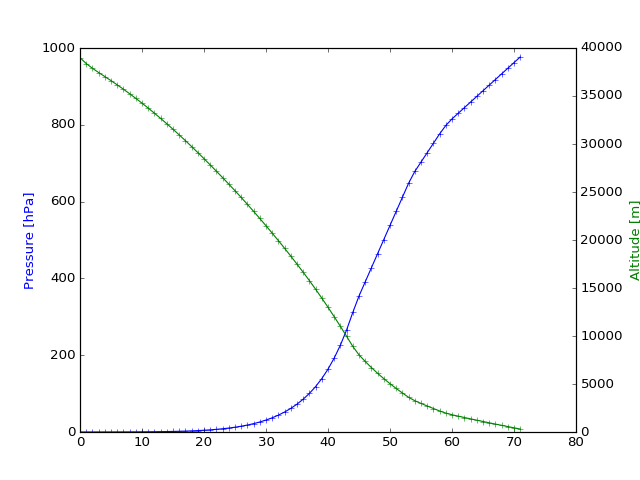

In [118]:
fig,ax = plt.subplots(1,1)
plt.plot(merra['levels'],'b+-')
ax2 = ax.twinx()
ax2.plot(p2alt(merra['levels']),'g+-')
ax2.set_ylabel('Altitude [m]',color='g')
ax.set_ylabel('Pressure [hPa]',color='b')

<IPython.core.display.Javascript object>


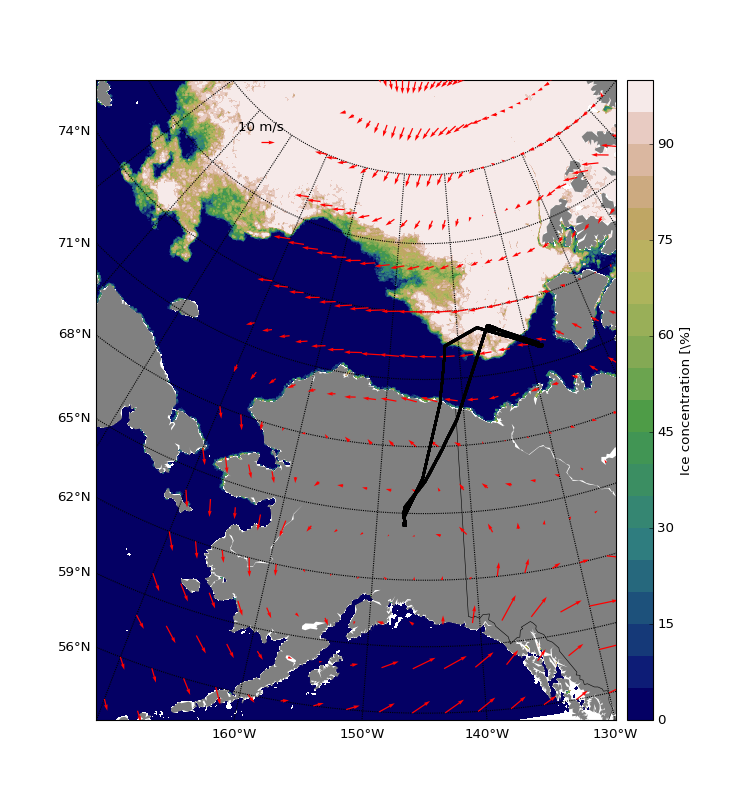

In [119]:
plt.figure(figsize=(5,10))
m = plt_amsr()
mlon = merra['latitude'][:,np.newaxis]*0.0+merra['longitude'][np.newaxis,:]
mlat = merra['latitude'][:,np.newaxis]+merra['longitude'][np.newaxis,:]*0.0
x,y = m(mlon,mlat)
q = plt.quiver(x[::4,::4],y[::4,::4],merra['u'][3,-10,::4,::4],merra['v'][3,-10,::4,::4],zorder=10,color='r')
x0,y0 = m(-185,79)
plt.quiverkey(q,x0,y0,10,'10 m/s',coordinates='data',color='r')
m.scatter(nav['Longitude'],nav['Latitude'],latlon=True,zorder=10,s=0.5,edgecolor='k')
#m.contour(mlon,mlat,merra['delp'][3,-10,:,:],latlon=True,zorder=10)
plt.savefig(fp+'plots_v2/20140919_map_wind.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


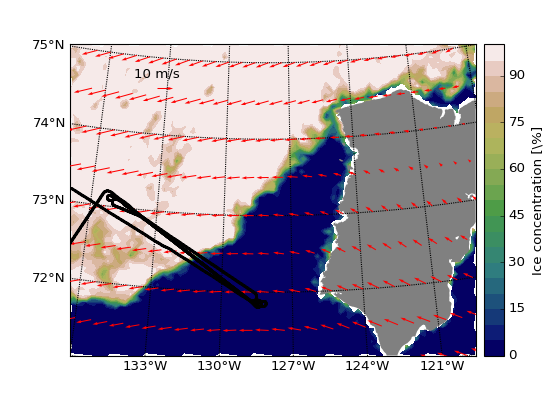

In [201]:
plt.figure(figsize=(7,5))
m = plt_amsr_zoom()
mlon = merra['latitude'][40:60,np.newaxis]*0.0+merra['longitude'][np.newaxis,50:78]
mlat = merra['latitude'][40:60,np.newaxis]+merra['longitude'][np.newaxis,50:78]*0.0
x,y = m(mlon,mlat)
q = plt.quiver(x,y,merra['u'][3,-10,40:60,50:78],merra['v'][3,-10,40:60,50:78],zorder=10,color='r')
x0,y0 = m(-133.5,74.6)
plt.quiverkey(q,x0,y0,10,'10 m/s',coordinates='data',color='r')
m.scatter(nav['Longitude'],nav['Latitude'],latlon=True,zorder=10,s=0.5,edgecolor='k')
#plt.savefig(fp+'plots_v2/20140919_map_zoom_wind.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


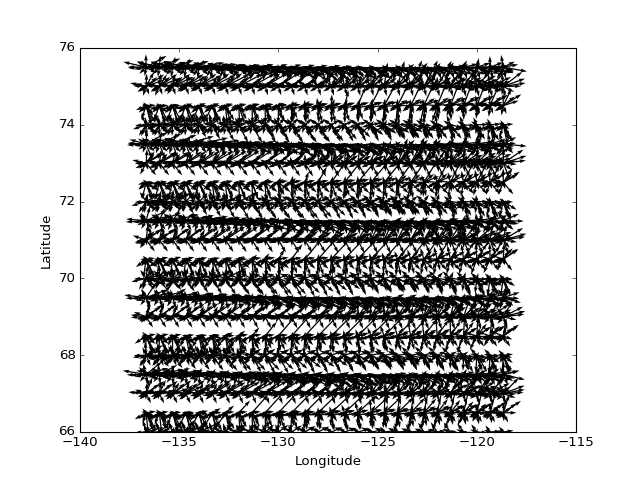

In [127]:
plt.figure()
plt.quiver(mlon,mlat,merra['u'][3,-10,:,:],merra['v'][3,-10,:,:])
plt.ylabel('Latitude')
plt.xlabel('Longitude')

## Plotting of profiles and flight paths

First get the indices in ice concentration linked to the flight path

Create a lat lon slice to use for correlating the sea ice concentration

In [61]:
points_lat = [73.2268,71.817716]
points_lon = [-135.3189167,-128.407833]

In [64]:
npoints = 200
flat = interpolate.interp1d([0,npoints],points_lat)
flon = interpolate.interp1d([0,npoints],points_lon)
path_lat = flat(np.arange(npoints))
path_lon = flon(np.arange(npoints))

In [65]:
ind = np.zeros((2,len(path_lat)), dtype=np.int)
for i,x in enumerate(path_lat):
    y = path_lon[i]
    ind[:,i] = np.unravel_index(np.nanargmin(np.square(amsr['lat']-x)+np.square(amsr['lon']-360.0-y)),amsr['lat'].shape)

In [66]:
ice_amsr = amsr['ice'][ind[0,:],ind[1,:]]

### Plot ou the sea ice concentration along flight path, and profiles

<IPython.core.display.Javascript object>


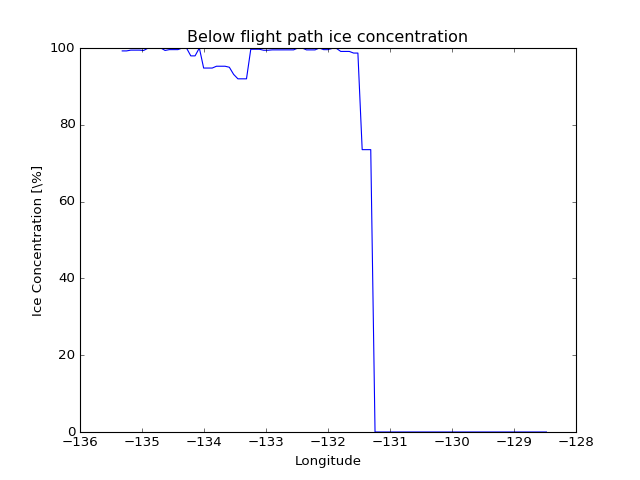

In [39]:
plt.figure()
plt.plot(path_lon,amsr['ice'][ind[0,:],ind[1,:]])
plt.ylabel('Ice Concentration [\%]')
plt.xlabel('Longitude')
plt.title('Below flight path ice concentration')

<IPython.core.display.Javascript object>


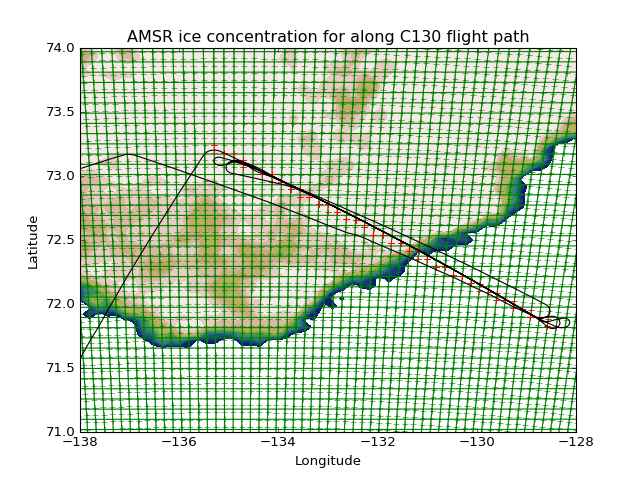

In [68]:
plt.figure()
plt.plot(amsr['lon'].reshape(amsr['lon'].size)-360,amsr['lat'].reshape(amsr['lon'].size),'g+-')
plt.plot(amsr['lon'][ind[0,:],ind[1,:]]-360.0,amsr['lat'][ind[0,:],ind[1,:]],'r+')
plt.plot(nav['Longitude'],nav['Latitude'],'k')
plt.xlim([-138,-128])
plt.ylim([71,74])
clevels = np.linspace(0,100,21)
plt.contourf(amsr['lon']-360.0,amsr['lat'],amsr['ice'],clevels,cmap=plt.cm.gist_earth)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('AMSR ice concentration for along C130 flight path')

<IPython.core.display.Javascript object>


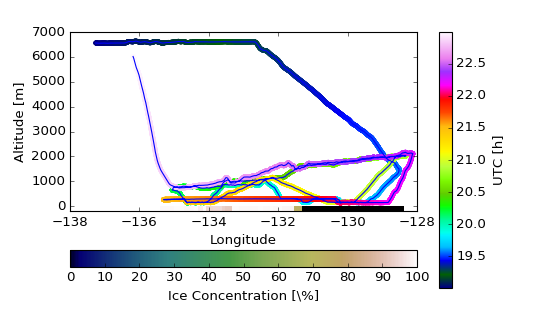

In [137]:
plt.figure(figsize=(7,4))
plt.plot(nav['Longitude'][flt],nav['GPS_Altitude'][flt])
plt.xlabel('Longitude')
plt.ylabel('Altitude [m]')
plt.ylim([-200,7000])
plt.xlim([-138,-128])
ss = plt.scatter(nav['Longitude'][flt],nav['GPS_Altitude'][flt],c=nav['Start_UTC'][flt],edgecolor='None',cmap=cm.gist_ncar)
si = plt.scatter(path_lon,path_lon*0.0-100,c=amsr['ice'][ind[0,:],ind[1,:]],
                 marker='s',edgecolor='None',cmap=cm.gist_earth,s=30,clip_on=False)
cbar = plt.colorbar(ss)
cbar.set_label('UTC [h]')
cbar = plt.colorbar(si,orientation='horizontal')
cbar.set_label('Ice Concentration [\%]')

plt.savefig(fp+'plots_v2/20140919_proile_alt_ice.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


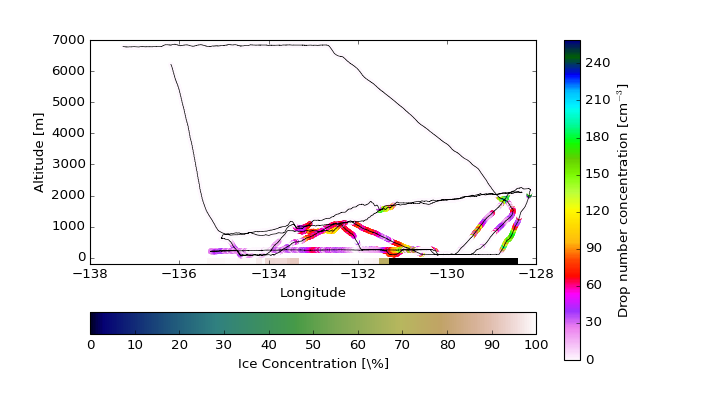

In [139]:
plt.figure(figsize=(9,5))
plt.plot(probe['Longitude_deg'][flt_prb],probe['PressAlt_ft'][flt_prb]*feet2meter,'k',linewidth=0.6)
plt.xlabel('Longitude')
plt.ylabel('Altitude [m]')
plt.ylim([-200,7000])
plt.xlim([-138,-128])
#ss = plt.scatter(nav['Longitude'][flt],nav['GPS_Altitude'][flt],c=nav['Start_UTC'][flt],edgecolor='None',cmap=cm.gist_ncar)
si = plt.scatter(path_lon,path_lon*0.0-100,c=amsr['ice'][ind[0,:],ind[1,:]],
                 marker='s',edgecolor='None',cmap=cm.gist_earth,s=30,clip_on=False)
#cbar = plt.colorbar(ss)
#cbar.set_label('UTC [h]')
ss = plt.scatter(probe['Longitude_deg'][flt_prb],probe['PressAlt_ft'][flt_prb]*feet2meter,
                 c=probe['nCDP_cm3'][flt_prb],edgecolor='None',
                 cmap=cm.gist_ncar_r)
cbar = plt.colorbar(ss)
cbar.set_label('Drop number concentration [cm$^{-3}$]')

cbar = plt.colorbar(si,orientation='horizontal')
cbar.set_label('Ice Concentration [\%]')

plt.savefig(fp+'plots_v2/20140919_profile_alt_cloud_ice.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


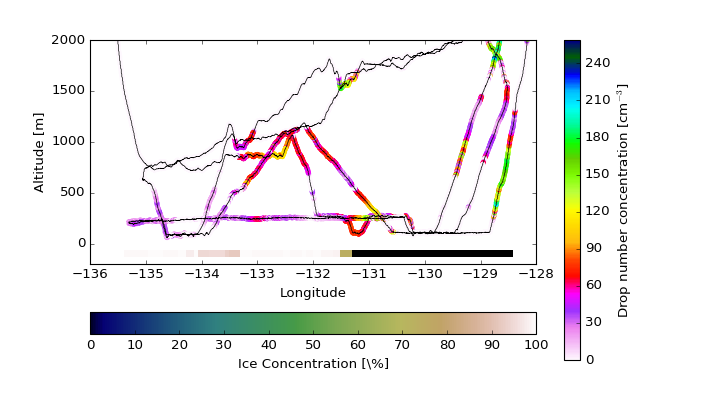

In [141]:
plt.figure(figsize=(9,5))
plt.plot(probe['Longitude_deg'][flt_prb],probe['PressAlt_ft'][flt_prb]*feet2meter,'k',linewidth=0.6)
plt.xlabel('Longitude')
plt.ylabel('Altitude [m]')
plt.ylim([-200,2000])
plt.xlim([-136,-128])
#ss = plt.scatter(nav['Longitude'][flt],nav['GPS_Altitude'][flt],c=nav['Start_UTC'][flt],edgecolor='None',cmap=cm.gist_ncar)
si = plt.scatter(path_lon,path_lon*0.0-100,c=amsr['ice'][ind[0,:],ind[1,:]],
                 marker='s',edgecolor='None',cmap=cm.gist_earth,s=40,clip_on=False)
#cbar = plt.colorbar(ss)
#cbar.set_label('UTC [h]')
ss = plt.scatter(probe['Longitude_deg'][flt_prb],probe['PressAlt_ft'][flt_prb]*feet2meter,
                 c=probe['nCDP_cm3'][flt_prb],edgecolor='None',
                 cmap=cm.gist_ncar_r)
cbar = plt.colorbar(ss)
cbar.set_label('Drop number concentration [cm$^{-3}$]')

cbar = plt.colorbar(si,orientation='horizontal')
cbar.set_label('Ice Concentration [\%]')

plt.savefig(fp+'plots_v2/20140919_proile_zoom_alt_cloud_ice.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


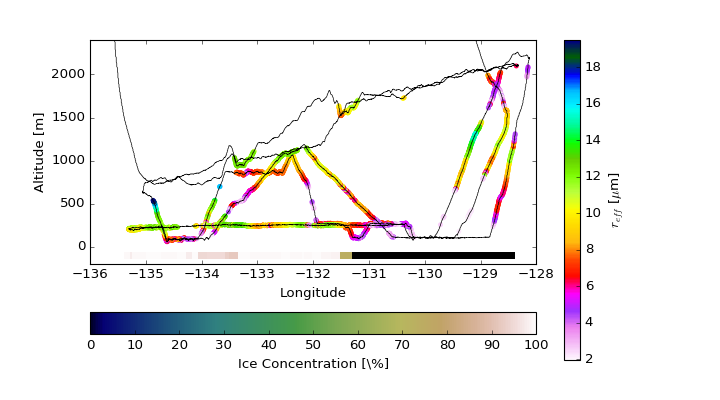

In [339]:
plt.figure(figsize=(9,5))
plt.plot(probe['Longitude_deg'][flt_prb],probe['PressAlt_ft'][flt_prb]*feet2meter,'k',linewidth=0.6)
plt.xlabel('Longitude')
plt.ylabel('Altitude [m]')
plt.ylim([-200,2400])
plt.xlim([-136,-128])
#ss = plt.scatter(nav['Longitude'][flt],nav['GPS_Altitude'][flt],c=nav['Start_UTC'][flt],edgecolor='None',cmap=cm.gist_ncar)
si = plt.scatter(path_lon,path_lon*0.0-100,c=amsr['ice'][ind[0,:],ind[1,:]],
                 marker='s',edgecolor='None',cmap=cm.gist_earth,s=40,clip_on=False)
#cbar = plt.colorbar(ss)
#cbar.set_label('UTC [h]')
ss = plt.scatter(probe['Longitude_deg'][flt_prb],probe['PressAlt_ft'][flt_prb]*feet2meter,
                 c=ref[flt_prb],edgecolor='None',
                 cmap=cm.gist_ncar_r)
cbar = plt.colorbar(ss)
cbar.set_label('$r_{eff}$ [$\\mu$m]')

cbar = plt.colorbar(si,orientation='horizontal')
cbar.set_label('Ice Concentration [\%]')

plt.savefig(fp+'plots_v2/20140919_ref_profile_zoom_alt_cloud_ice.png',dpi=600,transparent=True)


Now get a MERRA profile of winds on top of this.

## Load the retrieved 4STAR cloud properties

In [67]:
s = sio.loadmat(fp+'starzen/4STAR_20140919starzen.mat')

In [68]:
sps = Sp.Sp(s)

1556 1556
in rads
(1954, 1556) 2 1556
1 in ui
(1954, 1556)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0 and that are not parked
good length: 363 / 1954


In [69]:
rt_wat1 = hs.loadmat(fp+'ret/v3_wat1/20140919_zen_cld_retrieved.mat')
rt_wat2 = hs.loadmat(fp+'ret/v3_wat2/20140919_zen_cld_retrieved.mat')
rt_ice_low = hs.loadmat(fp+'ret/v3_ice_low/20140919_zen_cld_retrieved.mat')
rt_ice_mid = hs.loadmat(fp+'ret/v3_ice_mid/20140919_zen_cld_retrieved.mat')
rt_ice_top = hs.loadmat(fp+'ret/v3_ice_top/20140919_zen_cld_retrieved.mat')

Interpolate the albedo frrom SSFR to 4STAR times

In [70]:
iutc = (alb[:,150]>0) & (alb[:,150]<1) 
falb = interp1d(ssfr['utc'][iutc],alb[iutc,150],bounds_error=False)
alb_500 = falb(sps['utc'])

### Plot out the retrievals

In [71]:
rt_wat1.keys()

[u'tau', u'utc', u'ki', u'sza', u'lon', u'lat', u'phase', u'alt', u'ref']

<IPython.core.display.Javascript object>


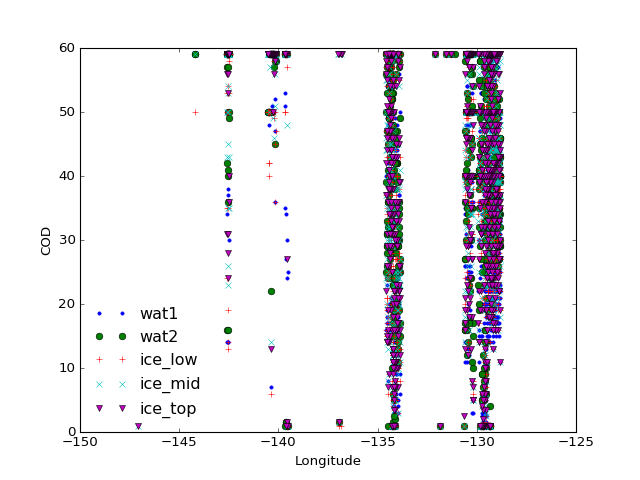

In [52]:
plt.figure()
plt.plot(rt_wat1['lon'],rt_wat1['tau'],'.',label='wat1')
plt.plot(rt_wat2['lon'],rt_wat2['tau'],'o',label='wat2')
plt.plot(rt_ice_low['lon'],rt_ice_low['tau'],'+',label='ice_low')
plt.plot(rt_ice_mid['lon'],rt_ice_mid['tau'],'x',label='ice_mid')
plt.plot(rt_ice_top['lon'],rt_ice_top['tau'],'v',label='ice_top')
plt.legend(frameon=False,loc=3)
plt.ylabel('COD')
plt.xlabel('Longitude')


<IPython.core.display.Javascript object>


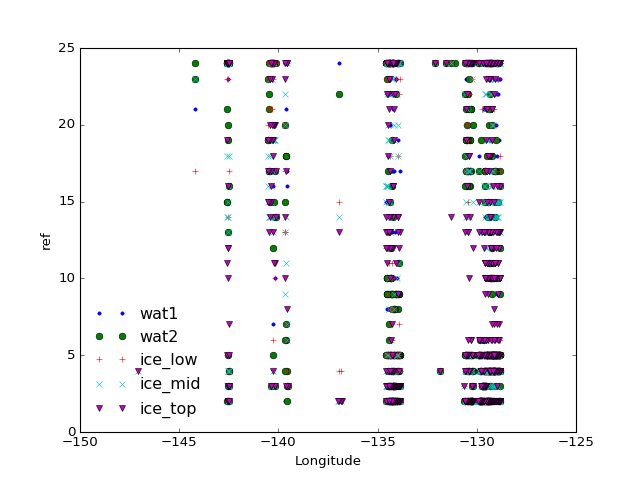

In [54]:
plt.figure()
plt.plot(rt_wat1['lon'],rt_wat1['ref'],'.',label='wat1')
plt.plot(rt_wat2['lon'],rt_wat2['ref'],'o',label='wat2')
plt.plot(rt_ice_low['lon'],rt_ice_low['ref'],'+',label='ice_low')
plt.plot(rt_ice_mid['lon'],rt_ice_mid['ref'],'x',label='ice_mid')
plt.plot(rt_ice_top['lon'],rt_ice_top['ref'],'v',label='ice_top')
plt.legend(frameon=False,loc=3)
plt.ylabel('ref')
plt.xlabel('Longitude')

### Filter bad data where vis and nir don't match

In [72]:
i_vis = [1061,1062,1064]
i_nir = [1060,1063]

In [73]:
nvis = np.nanmean(sps.norm[:,i_vis],axis=1)
nnir = np.nanmean(sps.norm[:,i_nir],axis=1)
rt_wat1['delta'] = abs(nvis-nnir)
rt_wat1['fl_match'] = rt_wat1['delta']<0.06

print rt_wat1['delta'].shape,rt_wat1['delta'][rt_wat1['fl_match']].shape,\
    float(rt_wat1['delta'][rt_wat1['fl_match']].shape[0])/ float(rt_wat1['delta'].shape[0])*100.0

rt_wat2['delta'] = abs(nvis-nnir)
rt_wat2['fl_match'] = rt_wat2['delta']<0.06
rt_ice_low['delta'] = abs(nvis-nnir)
rt_ice_low['fl_match'] = rt_ice_low['delta']<0.06
rt_ice_mid['delta'] = abs(nvis-nnir)
rt_ice_mid['fl_match'] = rt_ice_mid['delta']<0.06
rt_ice_top['delta'] = abs(nvis-nnir)
rt_ice_top['fl_match'] = rt_ice_top['delta']<0.06

(1954,) (788,) 40.3275332651


### Filter out high altitude

In [74]:
rt_wat1['fl_alt'] = rt_wat1['alt']<1200.0
rt_wat2['fl_alt'] = rt_wat2['alt']<1200.0
rt_ice_low['fl_alt'] = rt_ice_low['alt']<1200.0
rt_ice_mid['fl_alt'] = rt_ice_mid['alt']<1200.0
rt_ice_top['fl_alt'] = rt_ice_top['alt']<1200.0

In [75]:
print rt_wat1['fl_alt'].shape,rt_wat1['alt'][rt_wat1['fl_alt']].shape,\
    float(rt_wat1['alt'][rt_wat1['fl_alt']].shape[0])/ float(rt_wat1['alt'].shape[0])*100.0

(1954, 1) (1672,) 85.5680655067


### filter out high Ki squared residuals

<IPython.core.display.Javascript object>


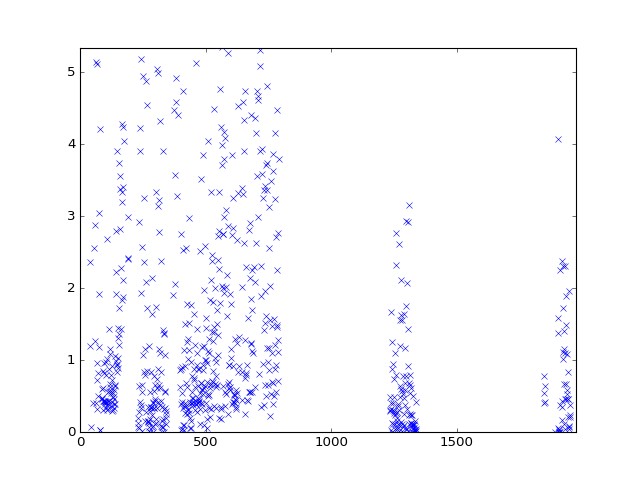

In [66]:
plt.figure()
plt.plot(rt_wat1['ki'],'x')

In [76]:
ki_limit = 0.6

In [77]:
rt_wat1['fl_ki'] = rt_wat1['ki']<ki_limit
rt_wat2['fl_ki'] = rt_wat2['ki']<ki_limit
rt_ice_low['fl_ki'] = rt_ice_low['ki']<ki_limit
rt_ice_mid['fl_ki'] = rt_ice_mid['ki']<ki_limit
rt_ice_top['fl_ki'] = rt_ice_top['ki']<ki_limit


In [78]:
print rt_wat1['fl_ki'].shape,rt_wat1['ki'][rt_wat1['fl_ki']].shape,\
    float(rt_wat1['ki'][rt_wat1['fl_ki']].shape[0])/ float(rt_wat1['ki'].shape[0])*100.0

(1954,) (302,) 15.4554759468


### Filer out railed values (cod =60 and ref =24)

In [79]:
tau_max = 59.0
rt_wat1['fl_tau'] = rt_wat1['tau']<tau_max
rt_wat2['fl_tau'] = rt_wat2['tau']<tau_max
rt_ice_low['fl_tau'] = rt_ice_low['tau']<tau_max
rt_ice_mid['fl_tau'] = rt_ice_mid['tau']<tau_max
rt_ice_top['fl_tau'] = rt_ice_top['tau']<tau_max


In [80]:
ref_max = 24.0
rt_wat1['fl_ref'] = rt_wat1['ref']<ref_max
rt_wat2['fl_ref'] = rt_wat2['ref']<ref_max
rt_ice_low['fl_ref'] = rt_ice_low['ref']<ref_max
rt_ice_mid['fl_ref'] = rt_ice_mid['ref']<ref_max
rt_ice_top['fl_ref'] = rt_ice_top['ref']<ref_max


In [81]:
print 'rt_wat1, tau', float(rt_wat1['tau'][rt_wat1['fl_tau']].shape[0])/float(len(rt_wat1['tau'])) *100.0, '%'
print 'rt_wat1, ref', float(rt_wat1['ref'][rt_wat1['fl_ref']].shape[0])/float(len(rt_wat1['ref'])) *100.0, '%'

rt_wat1, tau 34.8004094166 %
rt_wat1, ref 21.2896622313 %


### Combine the filters

In [82]:
rt_wat1['fl'] = rt_wat1['fl_match'] & rt_wat1['fl_alt'][:,0] & rt_wat1['fl_ki'] & rt_wat1['fl_tau'] & rt_wat1['fl_ref']
rt_wat2['fl'] = rt_wat2['fl_match'] & rt_wat2['fl_alt'][:,0] & rt_wat2['fl_ki'] & rt_wat2['fl_tau'] & rt_wat2['fl_ref']
rt_ice_low['fl'] = rt_ice_low['fl_match'] & rt_ice_low['fl_alt'][:,0] & rt_ice_low['fl_ki'] \
& rt_ice_low['fl_tau'] & rt_ice_low['fl_ref']
rt_ice_mid['fl'] = rt_ice_mid['fl_match'] & rt_ice_mid['fl_alt'][:,0] & rt_ice_mid['fl_ki'] \
& rt_ice_mid['fl_tau'] & rt_ice_mid['fl_ref']
rt_ice_top['fl'] = rt_ice_top['fl_match'] & rt_ice_top['fl_alt'][:,0] & rt_ice_top['fl_ki'] \
& rt_ice_top['fl_tau'] & rt_ice_top['fl_ref']

In [83]:
print 'rt_wat1', float(rt_wat1['tau'][rt_wat1['fl']].shape[0])/float(len(rt_wat1['tau'])) *100.0, '%'
print 'rt_wat2', float(rt_wat2['tau'][rt_wat2['fl']].shape[0])/float(len(rt_wat2['tau'])) *100.0, '%'
print 'rt_ice_low', float(rt_ice_low['tau'][rt_ice_low['fl']].shape[0])/float(len(rt_ice_low['tau'])) *100.0, '%'
print 'rt_ice_mid', float(rt_ice_mid['tau'][rt_ice_mid['fl']].shape[0])/float(len(rt_ice_mid['tau'])) *100.0, '%'
print 'rt_ice_top', float(rt_ice_top['tau'][rt_ice_top['fl']].shape[0])/float(len(rt_ice_top['tau'])) *100.0, '%'

rt_wat1 3.9406345957 %
rt_wat2 8.85363357216 %
rt_ice_low 6.96008188332 %
rt_ice_mid 8.34186284545 %
rt_ice_top 8.75127942682 %


### Plot the filtered products

<IPython.core.display.Javascript object>


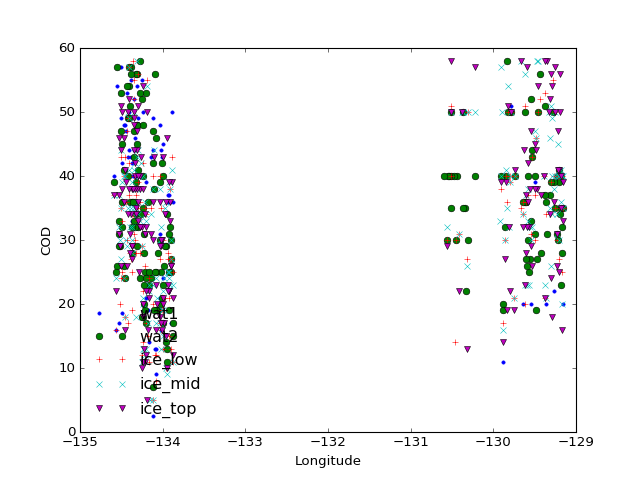

In [123]:
plt.figure()
plt.plot(rt_wat1['lon'][rt_wat1['fl']],rt_wat1['tau'][rt_wat1['fl']],'.',label='wat1')
plt.plot(rt_wat2['lon'][rt_wat2['fl']],rt_wat2['tau'][rt_wat2['fl']],'o',label='wat2')
plt.plot(rt_ice_low['lon'][rt_ice_low['fl']],rt_ice_low['tau'][rt_ice_low['fl']],'+',label='ice_low')
plt.plot(rt_ice_mid['lon'][rt_ice_mid['fl']],rt_ice_mid['tau'][rt_ice_mid['fl']],'x',label='ice_mid')
plt.plot(rt_ice_top['lon'][rt_ice_top['fl']],rt_ice_top['tau'][rt_ice_top['fl']],'v',label='ice_top')
plt.legend(frameon=False,loc=3)
plt.ylabel('COD')
plt.xlabel('Longitude')

<IPython.core.display.Javascript object>


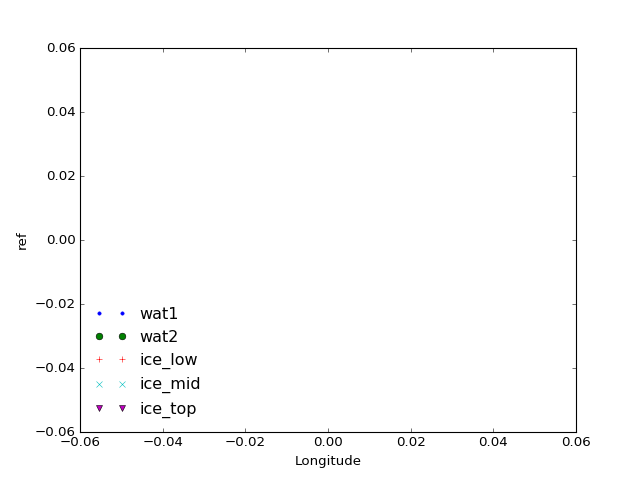

In [200]:
plt.figure()
plt.plot(rt_wat1['lon'][rt_wat1['fl']],rt_wat1['ref'][rt_wat1['fl']],'.',label='wat1')
plt.plot(rt_wat2['lon'][rt_wat2['fl']],rt_wat2['ref'][rt_wat2['fl']],'o',label='wat2')
plt.plot(rt_ice_low['lon'][rt_ice_low['fl']],rt_ice_low['ref'][rt_ice_low['fl']],'+',label='ice_low')
plt.plot(rt_ice_mid['lon'][rt_ice_mid['fl']],rt_ice_mid['ref'][rt_ice_mid['fl']],'x',label='ice_mid')
plt.plot(rt_ice_top['lon'][rt_ice_top['fl']],rt_ice_top['ref'][rt_ice_top['fl']],'v',label='ice_top')
plt.legend(frameon=False,loc=3)
plt.ylabel('ref')
plt.xlabel('Longitude')

### Select values dependent on surface reflectance

In [84]:
# wat1_pure, wat2_inter, ice_low, ice_mid, ice_top
alb_lut = [0.0445,0.0554,0.4980,0.5792,0.6561]

In [85]:
alb_index = [np.abs(alb_lut-a).argmin() for a in alb_500]

In [84]:
alb_index

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [86]:
tau_wat1 = rt_wat1['tau']
tau_wat1[~rt_wat1['fl']] = np.nan
tau_wat2 = rt_wat2['tau']
tau_wat2[~rt_wat2['fl']] = np.nan
tau_ice_low = rt_ice_low['tau']
tau_ice_low[~rt_ice_low['fl']] = np.nan
tau_ice_mid = rt_ice_mid['tau']
tau_ice_mid[~rt_ice_mid['fl']] = np.nan
tau_ice_top = rt_ice_top['tau']
tau_ice_top[~rt_ice_top['fl']] = np.nan


In [87]:
ref_wat1 = rt_wat1['ref']
ref_wat1[~rt_wat1['fl']] = np.nan
ref_wat2 = rt_wat2['ref']
ref_wat2[~rt_wat2['fl']] = np.nan
ref_ice_low = rt_ice_low['ref']
ref_ice_low[~rt_ice_low['fl']] = np.nan
ref_ice_mid = rt_ice_mid['ref']
ref_ice_mid[~rt_ice_mid['fl']] = np.nan
ref_ice_top = rt_ice_top['ref']
ref_ice_top[~rt_ice_top['fl']] = np.nan

In [88]:
tmpt = np.array([tau_wat1,tau_wat2,tau_ice_low,tau_ice_mid,tau_ice_top])
tmpr = np.array([ref_wat1,ref_wat2,ref_ice_low,ref_ice_mid,ref_ice_top])

In [89]:
tmpt_wat = np.array([tau_wat1,tau_wat2])
tmpt_ice = np.array([tau_ice_low,tau_ice_mid,tau_ice_top]) 
tmpr_wat = np.array([ref_wat1,ref_wat2]) 
tmpr_ice = np.array([ref_ice_low,ref_ice_mid,ref_ice_top])

In [90]:
tmpt.shape, tmpr.shape

((5, 1954), (5, 1954))

In [91]:
ta = np.array([tmpt[a,j] for j,a in enumerate(alb_index)])

In [92]:
re = np.array([tmpr[a,j] for j,a in enumerate(alb_index)])

<IPython.core.display.Javascript object>


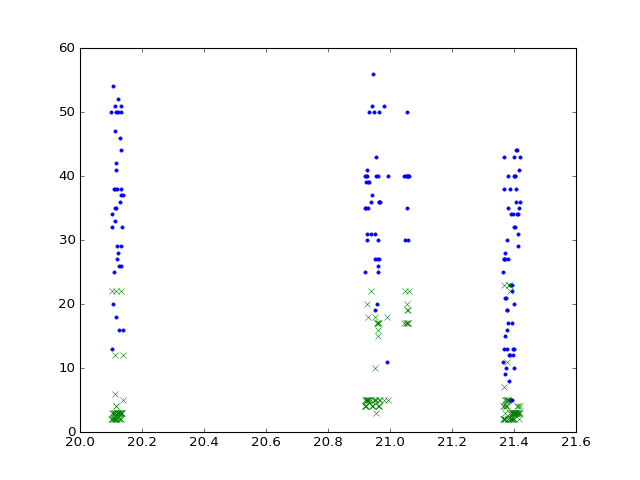

In [225]:
plt.figure()
plt.plot(rt_wat1['utc'],ta,'.')
plt.plot(rt_wat1['utc'],re,'x')

In [93]:
tas = Sp.smooth(ta,10,old=True)
res = Sp.smooth(re,10,old=True)

<IPython.core.display.Javascript object>


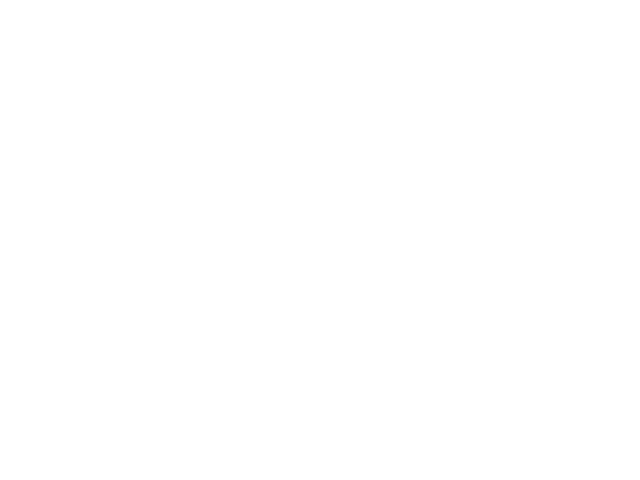

<IPython.core.display.Javascript object>


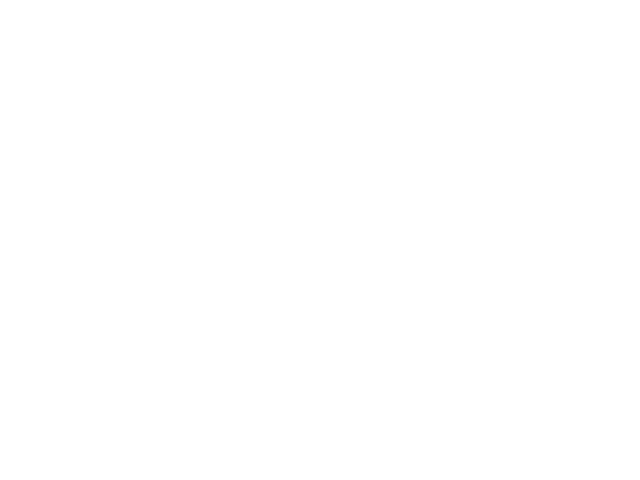

In [123]:
plt.figure()
plt.plot(rt_wat1['utc'],ta,'.')
plt.plot(rt_wat1['utc'],tas,'-')
plt.plot(rt_wat1['utc'],re,'x')
plt.plot(rt_wat1['utc'],res,'-')


### Get the error terms for tau, ref, and lwp, and plot

In [94]:
tau_err_wat = np.nanstd(tmpt_wat,axis=0)
ref_err_wat =  np.nanstd(tmpr_wat,axis=0)
tau_err_ice = np.nanstd(tmpt_ice,axis=0)
ref_err_ice =  np.nanstd(tmpr_ice,axis=0)

In [95]:
tr = np.array([tau_err_wat,tau_err_wat,tau_err_ice,tau_err_ice,tau_err_ice])
rr = np.array([ref_err_wat,ref_err_wat,ref_err_ice,ref_err_ice,ref_err_ice])
tau_err = np.array([tr[a,j] for j,a in enumerate(alb_index)])
ref_err = np.array([rr[a,j] for j,a in enumerate(alb_index)])

In [96]:
lwp = 5.0/9.0 * tas*res
lwp_err = np.sqrt((5.0/9.0 *res*tau_err)**2.0+ (5.0/9.0 * tas * ref_err)**2.0)

In [97]:
ibad = np.isnan(ta)
lwp[ibad] = np.nan
lwp_err[ibad] = np.nan
tas[ibad] = np.nan
res[ibad] = np.nan

In [98]:
utc = rt_wat1['utc']

<IPython.core.display.Javascript object>


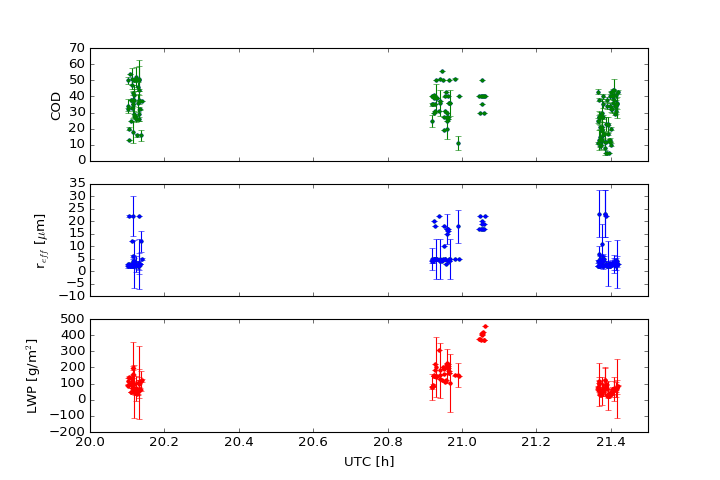

(20, 21.5)

In [249]:
fig,ax = plt.subplots(3,sharex=True,figsize=(9,6))
ax = ax.ravel()

ax[0].plot(utc,ta,'.')
ax[0].errorbar(utc,ta,yerr=tau_err,linestyle='None',marker='.')
ax[0].set_ylabel('COD')

ax[1].plot(utc,re,'g.')
ax[1].errorbar(utc,re,yerr=ref_err,linestyle='None',marker='.')
ax[1].set_ylabel('r$_{{eff}}$ [$\\mu$m]')

ax[2].plot(utc,lwp,'r.')
ax[2].errorbar(utc,lwp,yerr=lwp_err,linestyle='None',marker='.',color='r')
ax[2].set_ylabel('LWP [g/m$^2$]')
ax[2].set_xlabel('UTC [h]')

ax[2].set_xlim(20,21.5)


In [99]:
rt_wat1.keys()

['fl_match',
 u'tau',
 'fl_ki',
 'fl_tau',
 'fl_ref',
 u'utc',
 'fl',
 u'ki',
 u'sza',
 u'lon',
 u'lat',
 'fl_alt',
 'delta',
 u'phase',
 u'alt',
 u'ref']

In [100]:
retr = {'tau':ta,'ref':re,'tau_sm':tas,'ref_sm':res,'tau_err':tau_err,
        'ref_err':ref_err,'utc':utc,'lat':rt_wat1['lat'],'lon':rt_wat1['lon'],'alt':rt_wat1['alt'],
        'sza':rt_wat1['sza'],'fl':rt_wat1['fl'],'lwp':lwp,'lwp_err':lwp_err}

In [ ]:
retr['fwat'] = fwat
retr['fice'] = fice

## Now save the retrieved cloud values

In [103]:
import cPickle as pickle
import write_utils as wu
import hdf5storage as hs

In [122]:
mdict = {'retr':retr,'aqua':aqua,'terra':terra}

In [123]:
mdict1 = wu.iterate_dict_unicode(mdict)

no retr
no aqua
no terra


In [124]:
fp_out = fp+'20140919_retr_sav_v2.mat'
hs.savemat(fp_out,mdict1)

In [257]:
fpp_out = fp+'20140919_retr_sav_v2.p'
pickle.dump(mdict,open(fpp_out,"wb"))

### Alternatively load from save file

In [ ]:
import hdf5storage as hs

In [ ]:
fp_out = fp+'20140919_retr_sav_v2.mat'
retr = hs.loadmat(fp_out)

In [ ]:
tau_ice = retr['tau_ice_masked'] 
tau_wat = retr['tau_wat_masked']  
ref_ice = retr['ref_ice_masked']  
ref_wat = retr['ref_wat_masked']  
lwp_ice = retr['lwp_ice_masked']  
lwp_wat = retr['lwp_wat_masked']  

In [ ]:
fwat = retr['fwat']
fice = retr['fice']

# Build statistical comparisons

## Compile into statistics over water and over ice

In [101]:
fltice = np.where(retr['lon']<-132.0)[0]
fltwat = np.where(retr['lon']>-131.0)[0]

In [102]:
path_lon.shape, ice_amsr.shape

((200,), (200,))

In [103]:
id_ic = [np.argmin(abs(path_lon-l)) for l in retr['lon']]
retr['ice_conc'] = np.array(ice_amsr[id_ic])

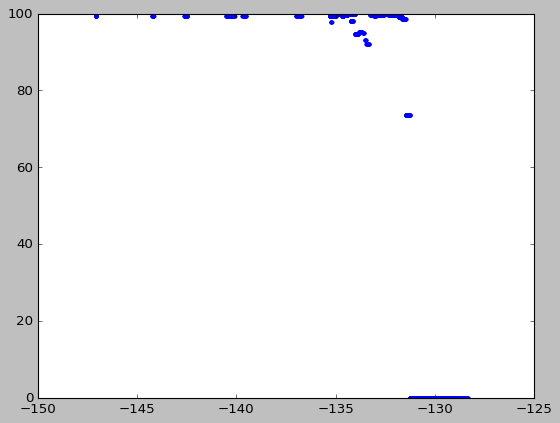

In [109]:
plt.figure()
plt.plot(retr['lon'],retr['ice_conc'],'.')

In [110]:
fice = retr['ice_conc'] > 50.0
fwat = retr['ice_conc'] < 50.0

In [111]:
tau_ice, itau_ice = Sp.nanmasked(retr['tau'][fice])
tau_wat, itau_wat = Sp.nanmasked(retr['tau'][fwat])
ref_ice, iref_ice = Sp.nanmasked(retr['ref'][fice])
ref_wat, iref_wat = Sp.nanmasked(retr['ref'][fwat])
lwp_ice, iref_ice = Sp.nanmasked(retr['lwp'][fice])
lwp_wat, iref_wat = Sp.nanmasked(retr['lwp'][fwat])

In [112]:
retr['tau_ice_masked'] = tau_ice
retr['tau_wat_masked'] = tau_wat
retr['ref_ice_masked'] = ref_ice
retr['ref_wat_masked'] = ref_wat
retr['lwp_ice_masked'] = lwp_ice
retr['lwp_wat_masked'] = lwp_wat

### Make some plots of the cloud property vs. sea ice

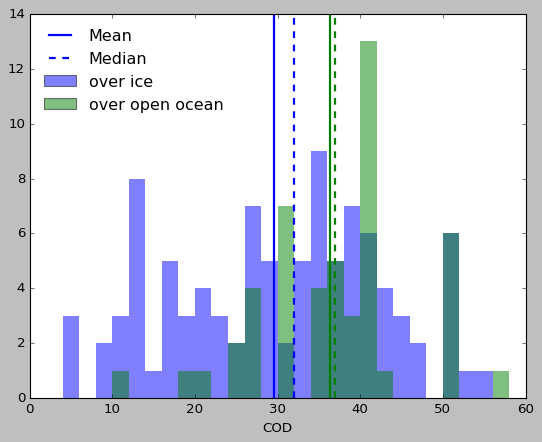

In [113]:
plt.figure()
plt.hist(ta[fltice],range=[0,60],color='b',edgecolor='None',bins=30,alpha=0.5,label='over ice')
plt.hist(ta[fltwat],range=[0,60],color='g',edgecolor='None',bins=30,alpha=0.5,label='over open ocean')

plt.axvline(np.nanmean(ta[fltice]),color='b',linestyle='-',label='Mean',linewidth=2)
plt.axvline(np.nanmedian(ta[fltice]),color='b',linestyle='--',label='Median',linewidth=2)

plt.axvline(np.nanmean(ta[fltwat]),color='g',linestyle='-',linewidth=2)
plt.axvline(np.nanmedian(ta[fltwat]),color='g',linestyle='--',linewidth=2)

plt.xlabel('COD')

plt.legend(frameon=False,loc=2)

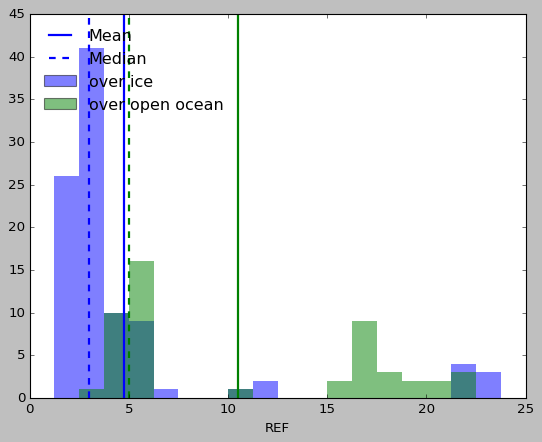

In [114]:
plt.figure()
plt.hist(re[fltice],range=[0,25],color='b',edgecolor='None',bins=20,alpha=0.5,label='over ice')
plt.hist(re[fltwat],range=[0,25],color='g',edgecolor='None',bins=20,alpha=0.5,label='over open ocean')

plt.axvline(np.nanmean(re[fltice]),color='b',linestyle='-',label='Mean',linewidth=2)
plt.axvline(np.nanmedian(re[fltice]),color='b',linestyle='--',label='Median',linewidth=2)

plt.axvline(np.nanmean(re[fltwat]),color='g',linestyle='-',linewidth=2)
plt.axvline(np.nanmedian(re[fltwat]),color='g',linestyle='--',linewidth=2)

plt.xlabel('REF')

plt.legend(frameon=False,loc=2)

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


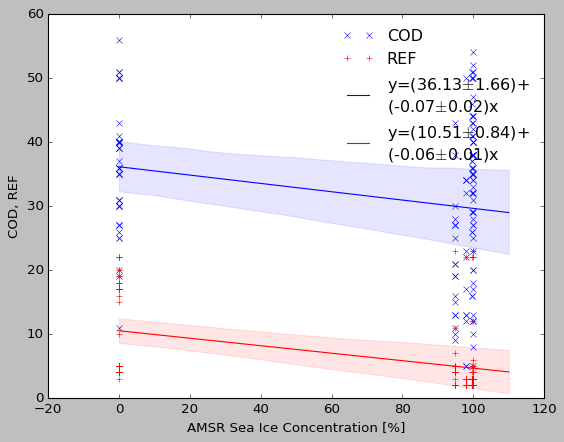

In [115]:
plt.figure()
plt.plot(retr['ice_conc'],retr['tau'],'x',label='COD')
plt.plot(retr['ice_conc'],retr['ref'],'r+',label='REF')
plt.xlim(-20,120)
pu.plot_lin(retr['ice_conc'],retr['tau'])
pu.plot_lin(retr['ice_conc'],retr['ref'],color='r')
plt.legend(frameon=False)
plt.ylabel('COD, REF')
plt.xlabel('AMSR Sea Ice Concentration [%]')

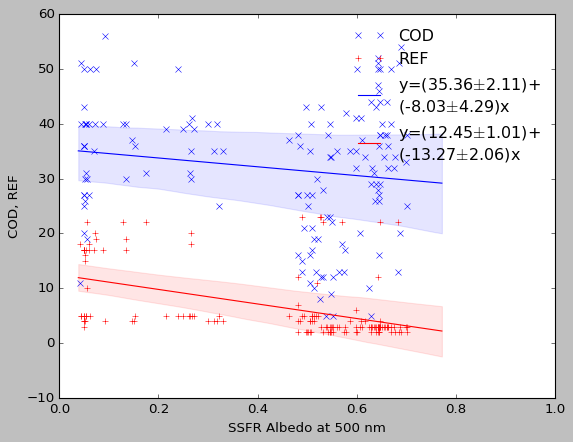

In [116]:
plt.figure()
plt.plot(alb_500,retr['tau'],'x',label='COD')
plt.plot(alb_500,retr['ref'],'r+',label='REF')
plt.xlim(0,1)
pu.plot_lin(alb_500,retr['tau'])
pu.plot_lin(alb_500,retr['ref'],color='r')
plt.legend(frameon=False)
plt.ylabel('COD, REF')
plt.xlabel('SSFR Albedo at 500 nm')

In [117]:
np.nanmean(ta[fwat])

36.326530612244895

In [118]:
def pop_out_mean_median(bp):
    for b in bp['means']:
        b.set_marker('o')
        b.set_color('None')
        b.set_markerfacecolor('k')
        b.set_markeredgecolor('k')
        b.set_alpha(0.6)
    for b in bp['medians']:
        b.set_linewidth(4)
        b.set_color('gold')
        b.set_alpha(0.6)

<IPython.core.display.Javascript object>


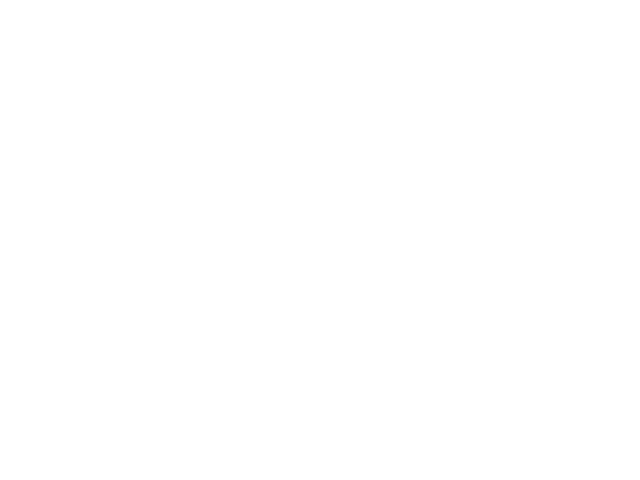

<IPython.core.display.Javascript object>


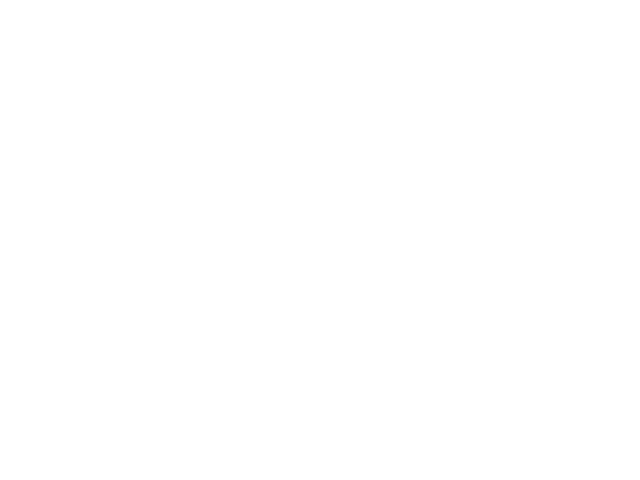

In [122]:
fig,ax = plt.subplots(1,3)
ax = ax.ravel()
bp0 = ax[0].boxplot([tau_wat,tau_ice],widths=[0.7,0.7],patch_artist=True,showmeans=True)
pu.color_box(bp0,'deepskyblue')
pop_out_mean_median(bp0)
ax[0].set_ylabel('COD')
ax[0].set_xticklabels(['water','ice'])

bp1 = ax[1].boxplot([ref_wat,ref_ice],widths=[0.7,0.7],patch_artist=True,showmeans=True)
pu.color_box(bp1,'limegreen')
pop_out_mean_median(bp1)
ax[1].set_ylabel('r$_{eff}$ [$\\mu$m]')
ax[1].set_xticklabels(['water','ice'])

bp2 = ax[2].boxplot([lwp_wat,lwp_ice],widths=[0.7,0.7],patch_artist=True,showmeans=True)
pu.color_box(bp2,'lightcoral')
pop_out_mean_median(bp2)
ax[2].set_ylabel('LWP')
ax[2].set_xticklabels(['water','ice'])

plt.tight_layout()
ax[1].set_title('4STAR retrieval under cloud')
plt.savefig(fp+'plots_v2/boxplot_tau_ref_lwp_4STAR.png',dpi=600,transparent=True)

### Setup some special plotting tools

In [54]:
def data2figpoints(x,dx):
    "function to tranform data locations to relative figure coordinates (in fractions of total figure)"
    flen = fig.transFigure.transform([1,1])
    bot = ax1.transAxes.transform([0,0])/flen
    top = ax1.transAxes.transform([1,1])/flen
    
    start = ax1.transData.transform([x,0])/flen
    end = ax1.transData.transform([x+dx,0])/flen
    left = start[0]
    bottom = bot[1]
    width = end[0]-start[0]
    height = top[1]-bot[1] 
    return left,bottom,width,height

In [101]:
def plot_vert_hist(fig,y,pos,ylim,color='grey',label=None,legend=False,onlyhist=True,loc=2):
    "function to plot a 'bean' like vertical histogram"
    import Sp_parameters as Sp
    (ymask,iy) = Sp.nanmasked(y)
    ax = fig.add_axes(data2figpoints(pos,0.4),frameon=False,ylim=ylim)
    ax.tick_params(axis='both', which='both', labelleft='off', labelright='off',bottom='off',top='off',
               labelbottom='off',labeltop='off',right='off',left='off')
    ax.hist(ymask,orientation='horizontal',normed=True,color=color,edgecolor='None',bins=30,alpha=0.5,label=label)
    if onlyhist:
        label_mean = None
        label_median = None
    else:
        label_mean = 'Mean'
        label_median = 'Median'
    ax.axhline(mean(ymask),color='red',linewidth=2,label=label_mean)
    ax.axhline(median(ymask),color='k',linewidth=2,linestyle='--',label=label_median)
    if legend:
        ax.legend(frameon=False,loc=loc)
    ax = fig.add_axes(data2figpoints(pos+0.01,-0.4),frameon=False,ylim=ylim)
    ax.tick_params(axis='both', which='both', labelleft='off', labelright='off',bottom='off',top='off',
                   labelbottom='off',labeltop='off',right='off',left='off')
    ax.hist(ymask,orientation='horizontal',normed=True,color=color,edgecolor='None',bins=30,alpha=0.5)
    ax.axhline(mean(ymask),color='red',linewidth=2)
    ax.axhline(median(ymask),color='k',linewidth=2,linestyle='--')

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\axes.py:8262: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 0 x 1)
  'this looks transposed (shape is %d x %d)' % x.shape[::-1])


ValueError: zero-size array to reduction operation minimum which has no identity

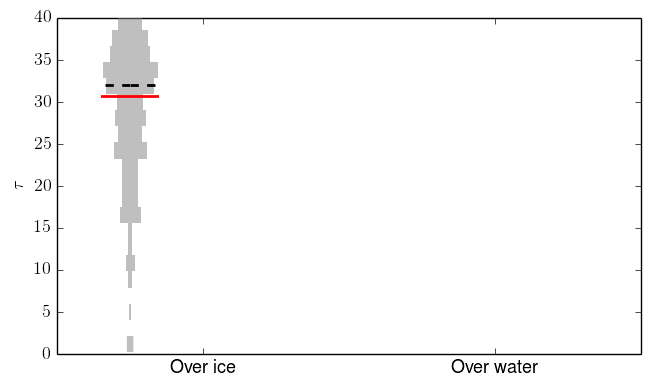

In [56]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[0,40],xlim=[-1,7])
ax1.set_ylabel('$\\tau$')
ax1.set_xticks([1,5])
ax1.set_xticklabels(['Over ice','Over water'])
plot_vert_hist(fig,stars.icetau[fltice],0,[0,40],color='grey',label='Total')
plot_vert_hist(fig,stars.icetau[fltice[stars.icephase[fltice]==1]],1,[0,40],color='red',label='Ice')
plot_vert_hist(fig,stars.icetau[fltice[stars.icephase[fltice]==0]],2,[0,40],color='blue',label='Liquid')
ax.legend()

plot_vert_hist(fig,stars.wattau[fltwat],4,[0,40],color='grey')
plot_vert_hist(fig,stars.wattau[fltwat[stars.watphase[fltwat]==1]],5,[0,40],color='red')
plot_vert_hist(fig,stars.wattau[fltwat[stars.watphase[fltwat]==0]],6,[0,40],color='blue')
ax1.set_title('Distribution of $\\tau$ over different surfaces')
plt.savefig(fp+'plots/20140919_pdf_surf_tau.png',dpi=600,transparent=True)

### plot out histograms over ice vs. open ocean

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[0,60],xlim=[-1,7])
ax1.set_ylabel('r$_{eff}$ [$\\mu$m]')
ax1.set_xticks([1,5])
ax1.set_xticklabels(['Over ice','Over water'])
plot_vert_hist(fig,stars.iceref[fltice],0,[0,60],color='grey',label='Total')
plot_vert_hist(fig,stars.iceref[fltice[stars.icephase[fltice]==1]],1,[0,60],color='red',label='Ice')
plot_vert_hist(fig,stars.iceref[fltice[stars.icephase[fltice]==0]],2,[0,60],color='blue',label='Liquid')

plot_vert_hist(fig,stars.watref[fltwat],4,[0,60],color='grey')
plot_vert_hist(fig,stars.watref[fltwat[stars.watphase[fltwat]==1]],5,[0,60],color='red')
plot_vert_hist(fig,stars.watref[fltwat[stars.watphase[fltwat]==0]],6,[0,60],color='blue')
ax1.set_title('Distribution of Effective Radius over different surfaces')
plt.savefig(fp+'plots/20140919_pdf_surf_ref.png',dpi=600,transparent=True)

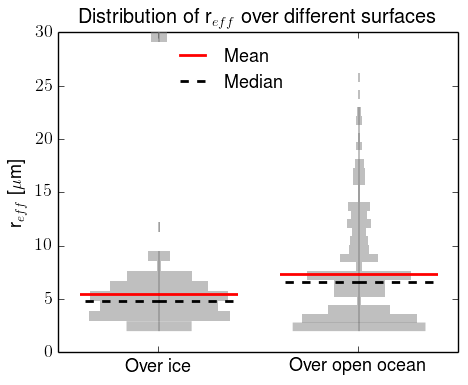

In [118]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[0,30],xlim=[0,2])
ax1.set_ylabel('r$_{eff}$ [$\\mu$m]')
ax1.set_xticks([0.5,1.5])
ax1.set_xticklabels(['Over ice','Over open ocean'])
plot_vert_hist(fig,stars.iceref[fltice],0.5,[0,30],color='grey',legend=True,onlyhist=False)
plot_vert_hist(fig,stars.watref[fltwat],1.5,[0,30],color='grey')

ax1.set_title('Distribution of r$_{eff}$ over different surfaces')
plt.savefig(fp+'plots/20140919_pdf_surf_tot_ref_forceliq.png',dpi=600,transparent=True)

In [138]:
print np.nanmean(stars.iceref[fltice])
print np.nanmean(stars.watref[fltwat])
print np.nanmean(stars.watref[fltwat])-np.nanmean(stars.iceref[fltice])
print np.nanmean(stars.watref[fltwat])-np.nanmean(stars.iceref[fltice])/np.nanmean(stars.watref[fltwat])*100.0

5.50553191489
7.3286908078
1.82315889291
-67.7943026337


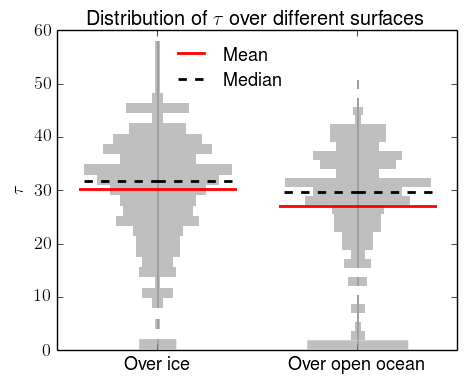

In [119]:
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[0,60],xlim=[0,2])
ax1.set_ylabel('$\\tau$')
ax1.set_xticks([0.5,1.5])
ax1.set_xticklabels(['Over ice','Over open ocean'])
plot_vert_hist(fig,stars.icetau[fltice],0.5,[0,60],color='grey',legend=True,onlyhist=False)
plot_vert_hist(fig,stars.wattau[fltwat],1.5,[0,60],color='grey')
ax1.set_title('Distribution of $\\tau$ over different surfaces')
plt.savefig(fp+'plots/20140919_pdf_surf_tot_tau_forceliq.png',dpi=600,transparent=True)

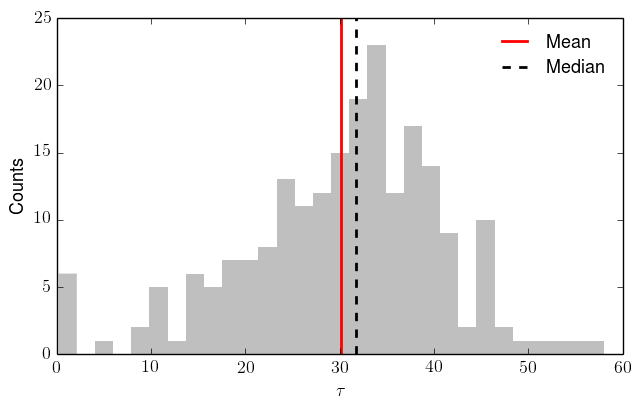

In [120]:
ntau,intau = Sp.nanmasked(stars.icetau[fltice])
plt.figure()
plt.hist(ntau,bins=30,color='grey',edgecolor='None',alpha=0.5)
plt.xlim([0,60])
plt.xlabel('$\\tau$')
plt.ylabel('Counts')
plt.axvline(np.mean(ntau),color='r',label='Mean',linewidth=2)
plt.axvline(np.median(ntau),color='k',linestyle='--',label='Median',linewidth=2)
plt.legend(frameon=False)
plt.savefig(fp+'plots/20140919_hist_tau_forceliq.png',dpi=600,transparent=True)

In [100]:
print np.nanmean(stars.icetau[fltice])
print np.nanmean(stars.wattau[fltwat])
print np.nanmean(stars.wattau[fltwat])-np.nanmean(stars.icetau[fltice])
print (np.nanmean(stars.wattau[fltwat])-np.nanmean(stars.icetau[fltice]))/np.nanmean(stars.wattau[fltwat])*100.0

30.1844339625
27.0648611114
-3.11957285114
-11.5262843519


In [101]:
print np.nanmean(stars.iceref[fltice])
print np.nanmean(stars.watref[fltwat])
print np.nanmean(stars.watref[fltwat])-np.nanmean(stars.iceref[fltice])
print (np.nanmean(stars.watref[fltwat])-np.nanmean(stars.iceref[fltice]))/np.nanmean(stars.watref[fltwat])*100.0

5.50553191489
7.3286908078
1.82315889291
24.8770065585


Plotting the over ice, tau and reff together, and also over ocean tau and ref together

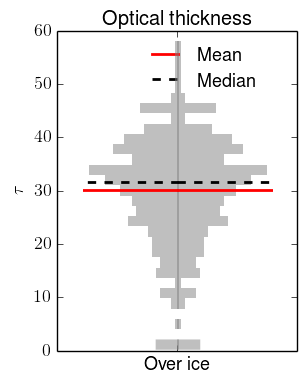

In [122]:
fig = plt.figure(figsize=(3,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[0,60],xlim=[0.5,1.5])
ax1.set_ylabel('$\\tau$')
ax1.set_xticks([1])
ax1.set_xticklabels(['Over ice'])
plot_vert_hist(fig,stars.icetau[fltice],1,[0,60],color='grey',legend=True,onlyhist=False,loc=1)
#plot_vert_hist(fig,stars.wattau[fltwat],1.5,[0,40],color='grey')
ax1.set_title('Optical thickness')
plt.savefig(fp+'plots/20140919_hist_tau_over_ice_forceliq.png',dpi=600,transparent=True)

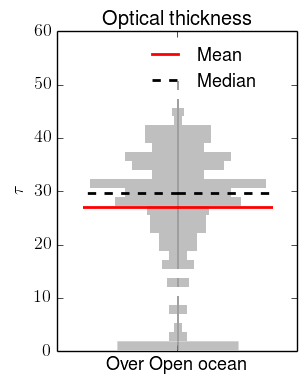

In [123]:
fig = plt.figure(figsize=(3,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[0,60],xlim=[0.5,1.5])
ax1.set_ylabel('$\\tau$')
ax1.set_xticks([1])
ax1.set_xticklabels(['Over Open ocean'])
#plot_vert_hist(fig,stars.icetau[fltice],1,[0,40],color='grey',legend=True,onlyhist=False,loc=1)
plot_vert_hist(fig,stars.wattau[fltwat],1,[0,60],color='grey',legend=True,onlyhist=False,loc=1)
ax1.set_title('Optical thickness')
plt.savefig(fp+'plots/20140919_hist_tau_over_ocean_forceliq.png',dpi=600,transparent=True)

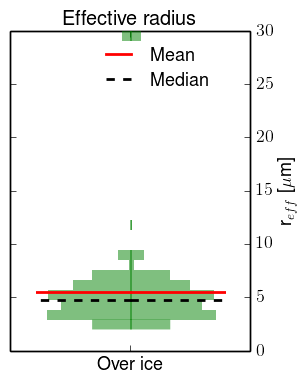

In [124]:
fig = plt.figure(figsize=(3,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[0,30],xlim=[0.5,1.5])
ax2 = ax1.twinx()
ax2.set_ylabel('r$_{eff}$ [$\\mu$m]')
ax2.set_ylim(ax1.get_ylim())
ax1.set_xticks([1])
ax1.set_xticklabels(['Over ice'])
ax1.tick_params(axis='y',which='both',labelleft='off', labelright='off')
ax2.tick_params(axis='both', which='both', labelleft='off', labelright='on',bottom='on',top='off',
               labelbottom='on',labeltop='off',right='on',left='off')
plot_vert_hist(fig,stars.iceref[fltice],1,[0,30],color='green',legend=True,onlyhist=False,loc=1)
#plot_vert_hist(fig,stars.wattau[fltwat],1.5,[0,40],color='grey')
ax1.set_title('Effective radius')
plt.savefig(fp+'plots/20140919_hist_ref_over_ice_forceliq.png',dpi=600,transparent=True)

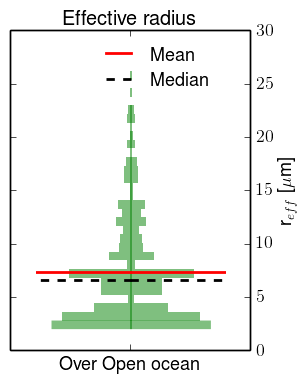

In [125]:
fig = plt.figure(figsize=(3,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[0,30],xlim=[0.5,1.5])
ax2 = ax1.twinx()
ax2.set_ylabel('r$_{eff}$ [$\\mu$m]')
ax2.set_ylim(ax1.get_ylim())
ax1.set_xticks([1])
ax1.set_xticklabels(['Over Open ocean'])
ax1.tick_params(axis='y',which='both',labelleft='off', labelright='off')
ax2.tick_params(axis='both', which='both', labelleft='off', labelright='on',bottom='on',top='off',
               labelbottom='on',labeltop='off',right='on',left='off')
#plot_vert_hist(fig,stars.iceref[fltice],1,[0,60],color='green',legend=True,onlyhist=False,loc=1)
plot_vert_hist(fig,stars.watref[fltwat],1,[0,30],color='green',legend=True,onlyhist=False,loc=1)
ax1.set_title('Effective radius')
plt.savefig(fp+'plots/20140919_hist_ref_over_ocean_forceliq.png',dpi=600,transparent=True)

Testing other types of plots

In [106]:
import statsmodels.api as sm

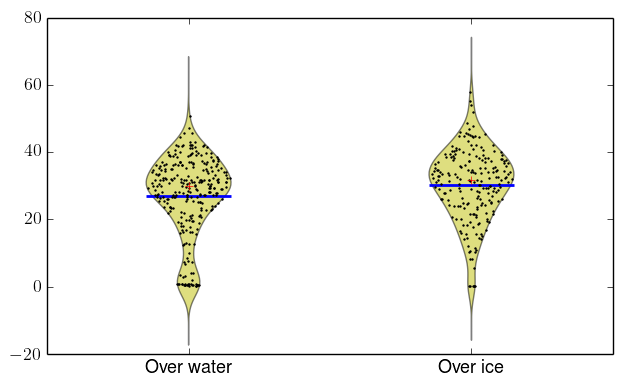

In [107]:
fig = sm.graphics.beanplot([stars.wattaumask,stars.icetaumask],
                           labels=['Over water','Over ice'],
                           jitter=True,
                           plot_opts={'jitter_marker':'+','jitter_marker_size':2})

## Now Match MODIS points to flight path

In [117]:
aqua.keys()

['tau',
 'etau',
 'cth',
 'multi_layer',
 'sza',
 'lon',
 'qa',
 'phase',
 'eref',
 'lat',
 'ref']

In [118]:
aqua['lon'].shape

(2030, 1354)

In [119]:
ind_aqua = np.zeros((2,len(path_lat)), dtype=np.int)
for i,x in enumerate(path_lat):
    y = path_lon[i]
    ind_aqua[:,i] = np.unravel_index(np.nanargmin(np.square(aqua['lat']-x)+np.square(aqua['lon']-y)),aqua['lat'].shape)

In [120]:
ind_terra = np.zeros((2,len(path_lat)), dtype=np.int)
for i,x in enumerate(path_lat):
    y = path_lon[i]
    ind_terra[:,i] = np.unravel_index(np.nanargmin(np.square(terra['lat']-x)+np.square(terra['lon']-y)),terra['lat'].shape)

## Plotting resulting MODIS cloud properties

<IPython.core.display.Javascript object>


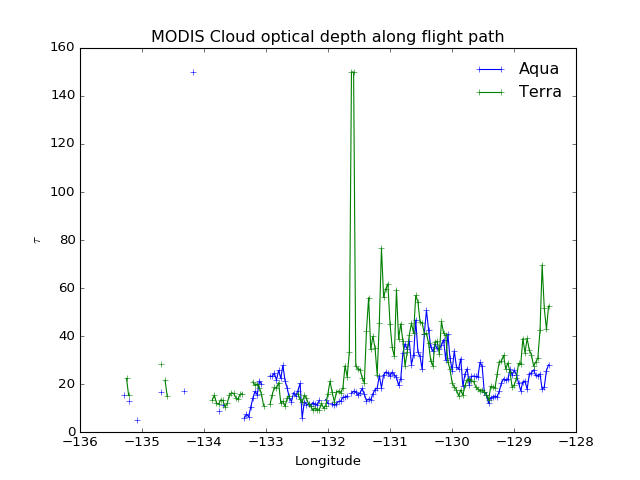

In [203]:
plt.figure()
plt.plot(path_lon,aqua['tau'][ind_aqua[0,:],ind_aqua[1,:]],'b+-',label='Aqua')
plt.plot(path_lon,terra['tau'][ind_terra[0,:],ind_terra[1,:]],'g+-',label='Terra')
plt.legend(frameon=False)
plt.ylabel('$\\tau$')
plt.xlabel('Longitude')
plt.title('MODIS Cloud optical depth along flight path')

<IPython.core.display.Javascript object>


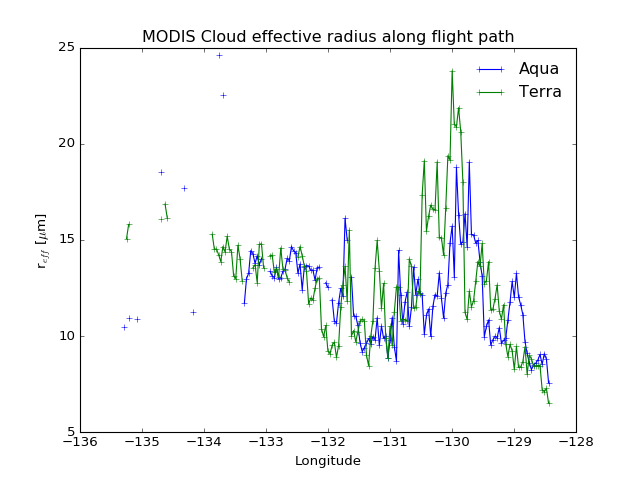

In [204]:
plt.figure()
plt.plot(path_lon,aqua['ref'][ind_aqua[0,:],ind_aqua[1,:]],'b+-',label='Aqua')
plt.plot(path_lon,terra['ref'][ind_terra[0,:],ind_terra[1,:]],'g+-',label='Terra')
plt.legend(frameon=False)
plt.ylabel('r$_{eff}$ [$\\mu$m]')
plt.xlabel('Longitude')
plt.title('MODIS Cloud effective radius along flight path')

In [121]:
pathice = np.where(path_lon<-132.0)[0]
pathwat = np.where(path_lon>-131.0)[0]

In [122]:
ind_aqua.shape

(2, 200)

## Build MODIS and 4STAR comparison plot

### Old style

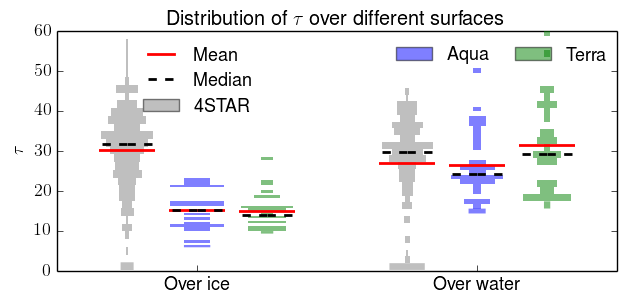

In [126]:
fig = plt.figure(figsize=(7,3))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[0,60],xlim=[-1,7])
ax1.set_ylabel('$\\tau$')
ax1.set_xticks([1,5])
ax1.set_xticklabels(['Over ice','Over water'])
ax1.tick_params(axis='x', which='both', top='off')
plot_vert_hist(fig,stars.icetau[fltice],0,[0,60],color='grey',label='4STAR',legend=True,onlyhist=False,loc=2)
plot_vert_hist(fig,aqua['tau'][ind_aqua[0,pathice],ind_aqua[1,pathice]],1,[0,60],color='blue')
plot_vert_hist(fig,terra['tau'][ind_terra[0,pathice],ind_terra[1,pathice]],2,[0,60],color='green')

plot_vert_hist(fig,stars.wattau[fltwat],4,[0,60],color='grey')
plot_vert_hist(fig,aqua['tau'][ind_aqua[0,pathwat],ind_aqua[1,pathwat]],5,[0,60],color='blue',label='Aqua',legend=True,loc=1)
plot_vert_hist(fig,terra['tau'][ind_terra[0,pathwat],ind_terra[1,pathwat]],6,[0,60],color='green',label='Terra',legend=True,loc=9)
ax1.set_title('Distribution of $\\tau$ over different surfaces')
plt.savefig(fp+'plots/20140919_comp_modis_tau_forceliq.png',dpi=600,transparent=True)

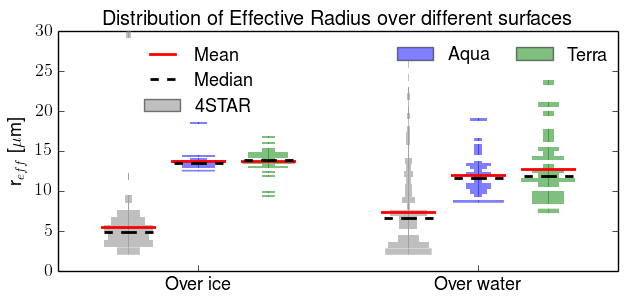

In [127]:
fig = plt.figure(figsize=(7,3))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[0,30],xlim=[-1,7])
ax1.set_ylabel('r$_{eff}$ [$\\mu$m]')
ax1.set_xticks([1,5])
ax1.set_xticklabels(['Over ice','Over water'])
ax1.tick_params(axis='x', which='both', top='off')
plot_vert_hist(fig,stars.iceref[fltice],0,[0,30],color='grey',label='4STAR',legend=True,onlyhist=False,loc=2)
plot_vert_hist(fig,aqua['ref'][ind_aqua[0,pathice],ind_aqua[1,pathice]],1,[0,30],color='blue')
plot_vert_hist(fig,terra['ref'][ind_terra[0,pathice],ind_terra[1,pathice]],2,[0,30],color='green')

plot_vert_hist(fig,stars.watref[fltwat],4,[0,30],color='grey')
plot_vert_hist(fig,aqua['ref'][ind_aqua[0,pathwat],ind_aqua[1,pathwat]],5,[0,30],color='blue',label='Aqua',legend=True,loc=1)
plot_vert_hist(fig,terra['ref'][ind_terra[0,pathwat],ind_terra[1,pathwat]],6,[0,30],color='green',label='Terra',legend=True,loc=9)
ax1.set_title('Distribution of Effective Radius over different surfaces')
plt.savefig(fp+'plots/20140919_comp_modis_ref_forceliq.png',dpi=600,transparent=True)

### New style

In [123]:
aqua_ref = aqua['ref'][ind_aqua[0,:],ind_aqua[1,:]]
retr['aqua_ref'] = np.array(aqua_ref[id_ic])
aref_wat,iaref_wat = Sp.nanmasked(retr['aqua_ref'][fwat])
aref_ice,iaref_ice = Sp.nanmasked(retr['aqua_ref'][fice])
aqua_tau = aqua['tau'][ind_aqua[0,:],ind_aqua[1,:]]
retr['aqua_tau'] = np.array(aqua_tau[id_ic])
atau_wat,iatau_wat = Sp.nanmasked(retr['aqua_tau'][fwat])
atau_ice,iatau_ice = Sp.nanmasked(retr['aqua_tau'][fice])

In [124]:
terra_ref = terra['ref'][ind_terra[0,:],ind_terra[1,:]]
retr['terra_ref'] = np.array(terra_ref[id_ic])
tref_wat,itref_wat = Sp.nanmasked(retr['terra_ref'][fwat])
tref_ice,itref_ice = Sp.nanmasked(retr['terra_ref'][fice])
terra_tau = terra['tau'][ind_terra[0,:],ind_terra[1,:]]
retr['terra_tau'] = np.array(terra_tau[id_ic])
ttau_wat,ittau_wat = Sp.nanmasked(retr['terra_tau'][fwat])
ttau_ice,ittau_ice = Sp.nanmasked(retr['terra_tau'][fice])

<IPython.core.display.Javascript object>


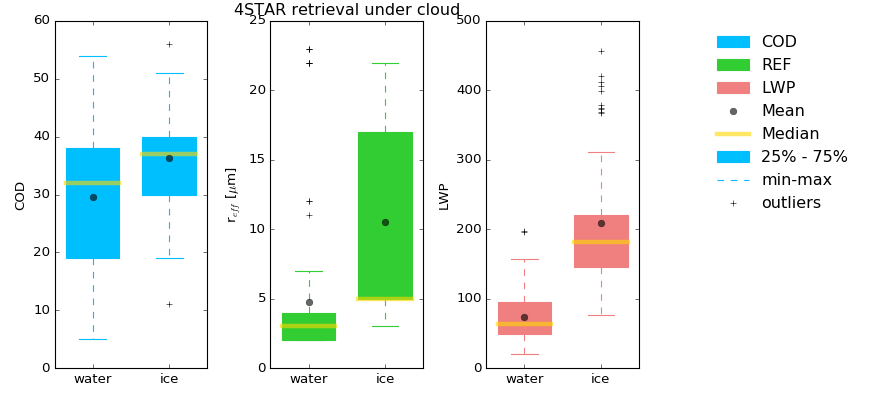

In [131]:
fig,ax = plt.subplots(1,4,figsize=(11,5))
ax = ax.ravel()
bp0 = ax[0].boxplot([tau_wat,tau_ice],widths=[0.7,0.7],patch_artist=True,showmeans=True)
pu.color_box(bp0,'deepskyblue')
pop_out_mean_median(bp0)
ax[0].set_ylabel('COD')
ax[0].set_xticklabels(['water','ice'])

bp1 = ax[1].boxplot([ref_wat,ref_ice],widths=[0.7,0.7],patch_artist=True,showmeans=True)
pu.color_box(bp1,'limegreen')
pop_out_mean_median(bp1)
ax[1].set_ylabel('r$_{eff}$ [$\\mu$m]')
ax[1].set_xticklabels(['water','ice'])

bp2 = ax[2].boxplot([lwp_wat,lwp_ice],widths=[0.7,0.7],patch_artist=True,showmeans=True)
pu.color_box(bp2,'lightcoral')
pop_out_mean_median(bp2)
ax[2].set_ylabel('LWP')
ax[2].set_xticklabels(['water','ice'])

plt.tight_layout()
ax[1].set_title('4STAR retrieval under cloud')

ax[3].set_axis_off()
plt.legend([bp0['boxes'][0],bp1['boxes'][0],bp2['boxes'][0],bp0['means'][0],bp0['medians'][0],bp0['boxes'][0],bp0['whiskers'][0],bp0['fliers'][0]],
           ['COD','REF','LWP','Mean','Median','25% - 75%','min-max','outliers'],
           frameon=False,loc=2,numpoints=1)
#plt.savefig(fp+'plots_v2/boxplot_tau_ref_lwp_4STAR.png',dpi=600,transparent=True)

In [125]:
reload(pu)

<module 'plotting_utils' from 'plotting_utils.pyc'>

<IPython.core.display.Javascript object>


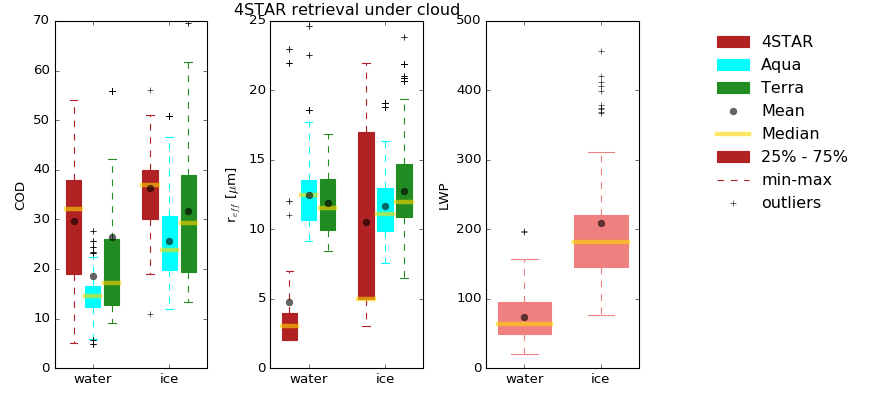

In [176]:
fig,ax = plt.subplots(1,4,figsize=(11,5))
ax = ax.ravel()
bp0 = ax[0].boxplot([tau_wat,atau_wat,ttau_wat,tau_ice,atau_ice,ttau_ice],positions=[1,1.5,2,3,3.5,4],
                    widths=0.4,patch_artist=True,showmeans=True)
pu.color_box(bp0,['firebrick','aqua','forestgreen','firebrick','aqua','forestgreen'])
pop_out_mean_median(bp0)
ax[0].set_ylabel('COD')
ax[0].set_xticks([1.5,3.5])
ax[0].set_xticklabels(['water','ice'])
ax[0].set_ylim(0,70)

bp1 = ax[1].boxplot([ref_wat,aref_wat,tref_wat,ref_ice,aref_ice,tref_ice],positions=[1,1.5,2,3,3.5,4],
                    widths=0.4,patch_artist=True,showmeans=True)
pu.color_box(bp1,['firebrick','aqua','forestgreen','firebrick','aqua','forestgreen'])
pop_out_mean_median(bp1)
ax[1].set_ylabel('r$_{eff}$ [$\\mu$m]')
ax[1].set_xticks([1.5,3.5])
ax[1].set_xticklabels(['water','ice'])

bp2 = ax[2].boxplot([lwp_wat,lwp_ice],widths=[0.7,0.7],patch_artist=True,showmeans=True)
pu.color_box(bp2,'lightcoral')
pop_out_mean_median(bp2)
ax[2].set_ylabel('LWP')
ax[2].set_xticklabels(['water','ice'])

plt.tight_layout()
ax[1].set_title('4STAR retrieval under cloud')

ax[3].set_axis_off()
plt.legend([bp0['boxes'][0],bp0['boxes'][1],bp0['boxes'][2],bp0['means'][0],bp0['medians'][0],bp0['boxes'][0],bp0['whiskers'][0],bp0['fliers'][0]],
           ['4STAR','Aqua','Terra','Mean','Median','25% - 75%','min-max','outliers'],
           frameon=False,loc=2,numpoints=1)

## Split Aqua and Terra data over ice / ocean

<IPython.core.display.Javascript object>


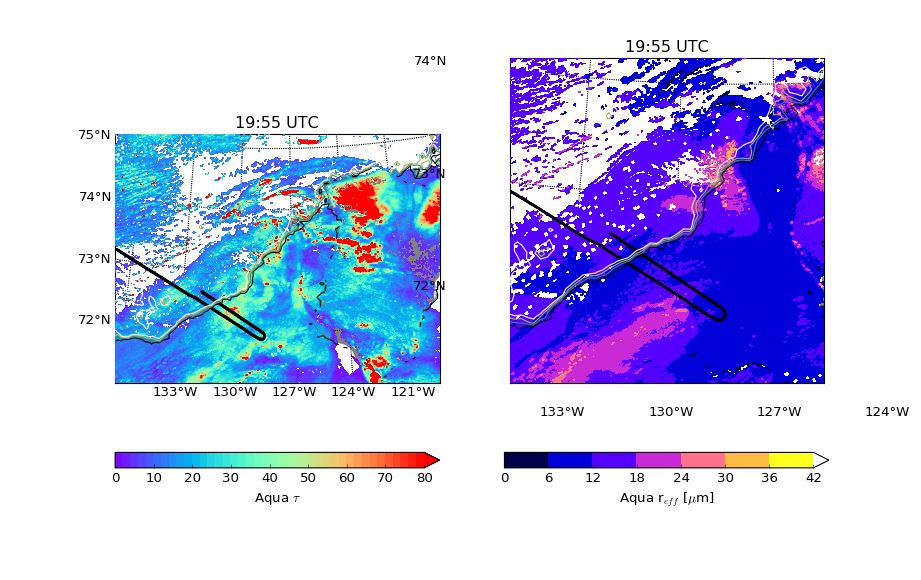

In [223]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
m = plt_amsr_cnt_zoom(ax=ax1)
clevels = np.linspace(0,80,41)
cc = m.contourf(aqua['lon'],aqua['lat'],aqua['tau'],clevels,latlon=True,cmap=plt.cm.rainbow,extend='max',zorder=10)
cbar = plt.colorbar(cc,orientation='horizontal')
cbar.set_label('Aqua $\\tau$')
m.scatter(nav['Longitude'][flt_aqua],nav['Latitude'][flt_aqua],latlon=True,zorder=10,s=0.5,edgecolor='k')
plt.title('19:55 UTC')

ax2 = fig.add_subplot(1,2,2)
m2 = plt_amsr_cnt_zoom(ax=ax2)
clevels2 = np.linspace(0,60,31)
cc = m2.contourf(aqua['lon'],aqua['lat'],aqua['ref'],6,latlon=True,cmap=plt.cm.gnuplot2,extend='max',zorder=10)
cbar = plt.colorbar(cc,orientation='horizontal')
cbar.set_label('Aqua r$_{eff}$ [$\\mu$m]')
m2.scatter(nav['Longitude'][flt_aqua],nav['Latitude'][flt_aqua],latlon=True,zorder=10,s=0.5,edgecolor='k')
plt.title('19:55 UTC')

### Link to AMSR ice concentration

<IPython.core.display.Javascript object>


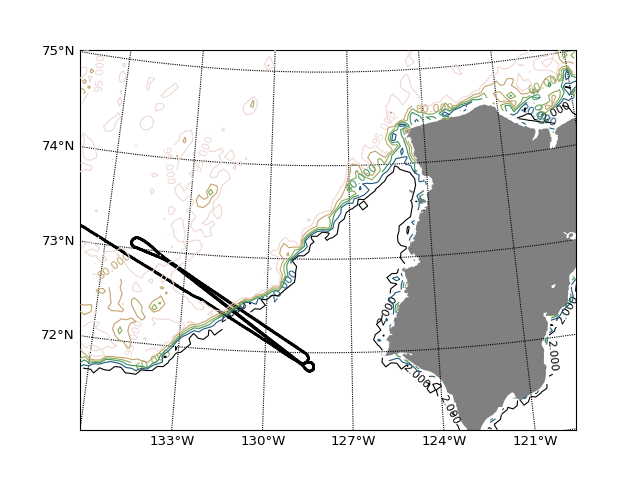

In [202]:
plt.figure()
m,cs = plt_amsr_cnt_zoom(return_cs=True)
m.scatter(nav['Longitude'][flt_terra],nav['Latitude'][flt_terra],latlon=True,zorder=10,s=0.5,edgecolor='k')

<IPython.core.display.Javascript object>


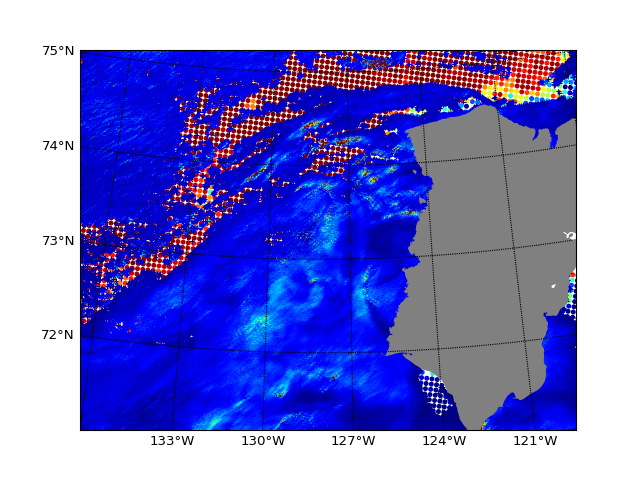

In [212]:
plt.figure()
m = Basemap(projection='stere',lat_0=72,lon_0=-128,
            llcrnrlon=-136,llcrnrlat=71,
            urcrnrlon=-117.5,urcrnrlat=75,resolution='h')
m.drawcountries()
m.fillcontinents(color='grey')
m.drawmeridians(np.linspace(-115,-145,11),labels=[0,0,0,1])
m.drawparallels(np.linspace(60,75,16),labels=[1,0,0,0])
x,y = m(amsr['lon'],amsr['lat'])
m.scatter(x,y,s=20,c=amsr['ice'],marker='o',edgecolor='None')

xa,ya = m(aqua['lon'],aqua['lat'])
m.scatter(xa,ya,s=20,c=aqua['tau'],marker='+')

In [266]:
flamsr = (amsr['lon']>(-135.0+360.0)) & (amsr['lon']<(-124.0+360.0)) & (amsr['lat']>71.0) & (amsr['lat']<75.0)

In [267]:
flamsr.any()

True

In [268]:
flaq = (aqua['lon']>(-135.0)) & (aqua['lon']<(-126.0)) & (aqua['lat']>71.5) & (aqua['lat']<74.5)
flte = (terra['lon']>(-135.0)) & (terra['lon']<(-126.0)) & (terra['lat']>71.5) & (terra['lat']<74.5)

In [269]:
i_amsr_aqua = [np.argmin((a-amsr['lat'][flamsr])**2.0+((aqua['lon'][flaq][i]+360.0)-amsr['lon'][flamsr])**2.0) for i,a in enumerate(aqua['lat'][flaq])]

In [270]:
aqua['ice'] = amsr['ice'][flamsr][i_amsr_aqua]

In [271]:
i_amsr_terra = [np.argmin((a-amsr['lat'][flamsr])**2.0+((terra['lon'][flte][i]+360.0)-amsr['lon'][flamsr])**2.0) for i,a in enumerate(terra['lat'][flte])]

In [272]:
terra['ice'] = amsr['ice'][flamsr][i_amsr_terra]

In [273]:
np.max(i_amsr_terra)

4028

In [274]:
aqua['ice'].shape

(87173,)

In [275]:
np.nanmax(aqua['ice']), np.nanmin(aqua['ice'])

(100.0, 0.0)

<IPython.core.display.Javascript object>


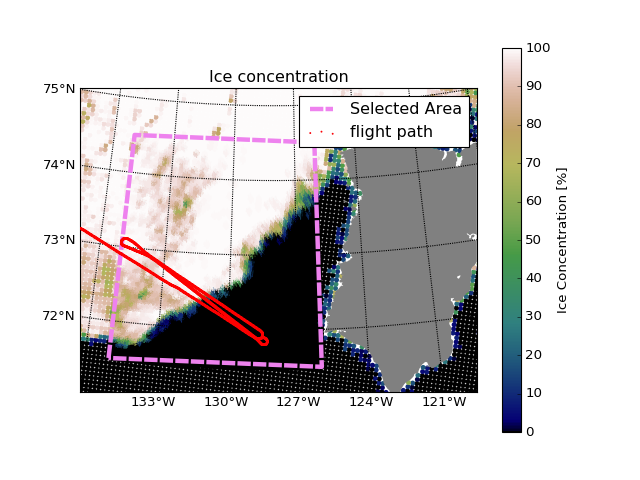

In [330]:
plt.figure()
m = Basemap(projection='stere',lat_0=72,lon_0=-128,
            llcrnrlon=-136,llcrnrlat=71,
            urcrnrlon=-117.5,urcrnrlat=75,resolution='h')
m.drawcountries()
m.fillcontinents(color='grey')
m.drawmeridians(np.linspace(-115,-145,11),labels=[0,0,0,1])
m.drawparallels(np.linspace(60,75,16),labels=[1,0,0,0])
x,y = m(amsr['lon'],amsr['lat'])
m.scatter(x,y,s=20,c=amsr['ice'],marker='o',edgecolor='None',cmap=plt.cm.gist_earth)

xa,ya = m(aqua['lon'][flaq],aqua['lat'][flaq])
m.scatter(xa,ya,s=20,c=aqua['ice'],marker='+',cmap=plt.cm.gist_earth)
cb = plt.colorbar()
cb.set_label('Ice Concentration [%]')
#m.scatter(xa[i],ya[i],s=50,c='g',marker='s')
#xp,yp = m(231.65921,72.95724)
#m.scatter(xp,yp,s=50,c='y',marker='d')
#(aqua['lon']>(-135.0)) & (aqua['lon']<(-126.0)) & (aqua['lat']>71.5) & (aqua['lat']<74.5)
xe,ye = m([-135.0,-135.0,-126.0,-126.0,-135.0],[71.5,74.5,74.5,71.5,71.5])
m.plot(xe,ye,color='violet',linewidth=4,label='Selected Area',dashes=[12, 2])
m.scatter(nav['Longitude'][flt_terra],nav['Latitude'][flt_terra],latlon=True,zorder=10,s=0.5,
          edgecolor='r',label='flight path')
plt.title('Ice concentration')
plt.legend(frameon=True)

plt.savefig(fp+'plots_v2/Ice_conc_area_subset.png',dpi=600,transparent=True)

### make filters and plot histogram

In [292]:
aqua['fl_ice'] = aqua['ice']>95.0
aqua['fl_wat'] = aqua['ice']<2.0
terra['fl_ice'] = terra['ice']>95.0
terra['fl_wat'] = terra['ice']<2.0

<IPython.core.display.Javascript object>


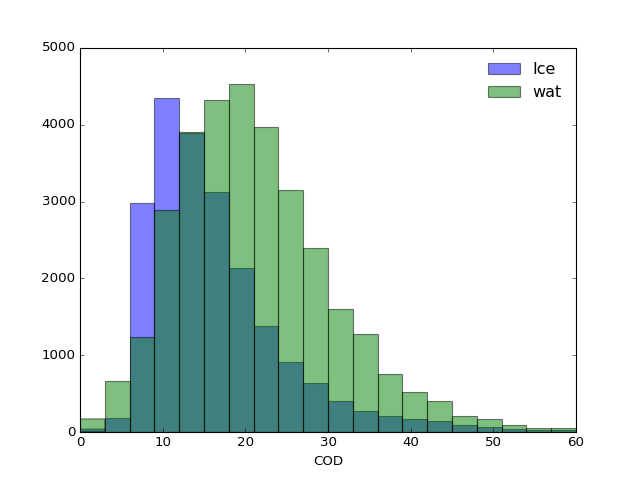

In [284]:
plt.figure()
plt.hist(aqua['tau'][flaq][aqua['fl_ice']],range=[0,60],label='Ice',bins=20,alpha=0.5)
plt.hist(aqua['tau'][flaq][aqua['fl_wat']],range=[0,60],label='wat',bins=20,alpha=0.5)
plt.legend(frameon=False)
plt.xlabel('COD')


<IPython.core.display.Javascript object>


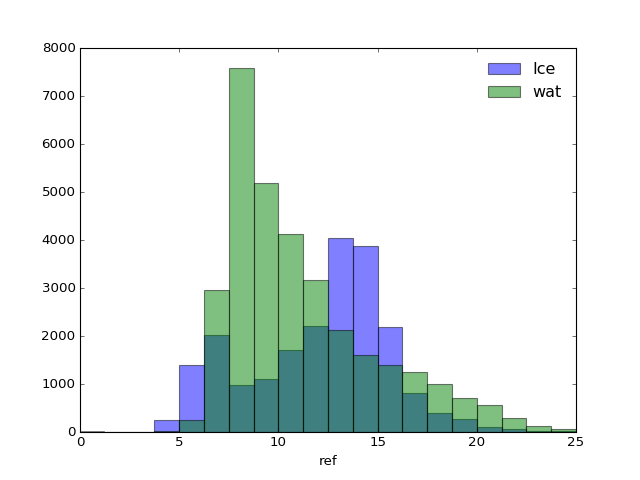

In [287]:
plt.figure()
plt.hist(aqua['ref'][flaq][aqua['fl_ice']],range=[0,25],label='Ice',bins=20,alpha=0.5)
plt.hist(aqua['ref'][flaq][aqua['fl_wat']],range=[0,25],label='wat',bins=20,alpha=0.5)
plt.legend(frameon=False)
plt.xlabel('ref')

In [305]:
atau_wat_area,inul = Sp.nanmasked(aqua['tau'][flaq][aqua['fl_wat']])
ttau_wat_area,inul = Sp.nanmasked(terra['tau'][flte][terra['fl_wat']])
atau_ice_area,inul = Sp.nanmasked(aqua['tau'][flaq][aqua['fl_ice']])
ttau_ice_area,inul = Sp.nanmasked(terra['tau'][flte][terra['fl_ice']])

In [310]:
aref_wat_area,inul = Sp.nanmasked(aqua['ref'][flaq][aqua['fl_wat']])
tref_wat_area,inul = Sp.nanmasked(terra['ref'][flte][terra['fl_wat']])
aref_ice_area,inul = Sp.nanmasked(aqua['ref'][flaq][aqua['fl_ice']])
tref_ice_area,inul = Sp.nanmasked(terra['ref'][flte][terra['fl_ice']])

<IPython.core.display.Javascript object>


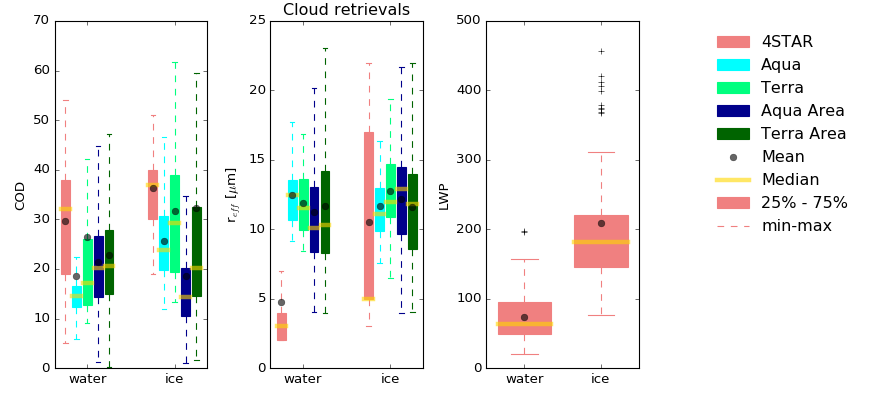

In [331]:
fig,ax = plt.subplots(1,4,figsize=(11,5))
ax = ax.ravel()
bp0 = ax[0].boxplot([tau_wat,atau_wat,ttau_wat,atau_wat_area,ttau_wat_area,
                    tau_ice,atau_ice,ttau_ice,atau_ice_area,ttau_ice_area],
                    positions=[1,1.5,2,2.5,3,5,5.5,6,6.5,7],widths=0.4,patch_artist=True,showmeans=True,showfliers=False)
pu.color_box(bp0,['lightcoral','aqua','springgreen','darkblue','darkgreen','lightcoral','aqua','springgreen','darkblue','darkgreen'])
pop_out_mean_median(bp0)
ax[0].set_ylabel('COD')
ax[0].set_xticks([2,6])
ax[0].set_xticklabels(['water','ice'])
ax[0].set_ylim(0,70)

bp1 = ax[1].boxplot([ref_wat,aref_wat,tref_wat,aref_wat_area,tref_wat_area,
                     ref_ice,aref_ice,tref_ice,aref_ice_area,tref_ice_area],
                    positions=[1,1.5,2,2.5,3,5,5.5,6,6.5,7],widths=0.4,patch_artist=True,showmeans=True,showfliers=False)
pu.color_box(bp1,['lightcoral','aqua','springgreen','darkblue','darkgreen','lightcoral','aqua','springgreen','darkblue','darkgreen'])
pop_out_mean_median(bp1)
ax[1].set_ylabel('r$_{eff}$ [$\\mu$m]')
ax[1].set_ylim(0,25)
ax[1].set_xticks([2,6])
ax[1].set_xticklabels(['water','ice'])

bp2 = ax[2].boxplot([lwp_wat,lwp_ice],widths=[0.7,0.7],patch_artist=True,showmeans=True)
pu.color_box(bp2,'lightcoral')
pop_out_mean_median(bp2)
ax[2].set_ylabel('LWP')
ax[2].set_xticklabels(['water','ice'])

plt.tight_layout()
ax[1].set_title('Cloud retrievals')

ax[3].set_axis_off()
plt.legend([bp0['boxes'][0],bp0['boxes'][1],bp0['boxes'][2],bp0['boxes'][3],bp0['boxes'][4],bp0['means'][0],bp0['medians'][0],bp0['boxes'][0],bp0['whiskers'][0]],
           ['4STAR','Aqua','Terra','Aqua Area','Terra Area','Mean','Median','25% - 75%','min-max'],
           frameon=False,loc=2,numpoints=1)

plt.savefig(fp+'plots_v2/box_ice_wat_COD_ref_LWP_area.png',dpi=600,transparent=True)

## Add coud probes

# CRE

## Downwelling and upwelling irradiance

### Do the over water first

In [68]:
waq_dn = np.zeros_like(aqua['ref'][ind_aqua[0,pathwat],ind_aqua[1,pathwat]])
wte_dn = np.zeros_like(terra['ref'][ind_terra[0,pathwat],ind_terra[1,pathwat]])
wst_dn = np.zeros_like(stars.watref[fltwat])
waq_up = np.zeros_like(aqua['ref'][ind_aqua[0,pathwat],ind_aqua[1,pathwat]])
wte_up = np.zeros_like(terra['ref'][ind_terra[0,pathwat],ind_terra[1,pathwat]])
wst_up = np.zeros_like(stars.watref[fltwat])

In [70]:
waq_dncl = np.zeros_like(aqua['ref'][ind_aqua[0,pathwat],ind_aqua[1,pathwat]])
wte_dncl = np.zeros_like(terra['ref'][ind_terra[0,pathwat],ind_terra[1,pathwat]])
wst_dncl = np.zeros_like(stars.watref[fltwat])
waq_upcl = np.zeros_like(aqua['ref'][ind_aqua[0,pathwat],ind_aqua[1,pathwat]])
wte_upcl = np.zeros_like(terra['ref'][ind_terra[0,pathwat],ind_terra[1,pathwat]])
wst_upcl = np.zeros_like(stars.watref[fltwat])

In [97]:
waq_cre = np.zeros_like(aqua['ref'][ind_aqua[0,pathwat],ind_aqua[1,pathwat]])
waq_rcre = np.zeros_like(aqua['ref'][ind_aqua[0,pathwat],ind_aqua[1,pathwat]])
wte_cre = np.zeros_like(terra['ref'][ind_terra[0,pathwat],ind_terra[1,pathwat]])
wst_cre = np.zeros_like(stars.watref[fltwat])
wte_rcre = np.zeros_like(terra['ref'][ind_terra[0,pathwat],ind_terra[1,pathwat]])
wst_rcre = np.zeros_like(stars.watref[fltwat])

In [66]:
#do over water
print swat['sp_irrdn'].shape
print 'sp (wp, wvl, z, re, ta)'

(2L, 1556L, 2L, 35L, 24L)
sp (wp, wvl, z, re, ta)


In [90]:
def get_rad_close(s,wvl,p,z,t,r):
    it = np.argmin(abs(swat['tau']-t))
    ir = np.argmin(abs(swat['ref']-r))
    return np.sum(s[p,250:,z,it,ir]*wvl[250:]/1000.0)

In [91]:
ref_dn = get_rad_close(swat['sp_irrdn'],swat['zenlambda'],0,1,0,0)

In [106]:
for i,t in enumerate(aqua['tau'][ind_aqua[0,pathwat],ind_aqua[1,pathwat]]):
    r = aqua['ref'][ind_aqua[0,pathwat],ind_aqua[1,pathwat]][i]
    waq_dn[i] = get_rad_close(swat['sp_irrdn'],swat['zenlambda'],0,0,t,r)
    waq_up[i] = get_rad_close(swat['sp_irrup'],swat['zenlambda'],0,0,t,r)
    waq_dncl[i] = get_rad_close(swat['sp_irrdn'],swat['zenlambda'],0,0,0,0)
    waq_upcl[i] = get_rad_close(swat['sp_irrup'],swat['zenlambda'],0,0,0,0)
    waq_cre[i] = (waq_dn[i]-waq_up[i])-(waq_dncl[i]-waq_upcl[i])
    waq_rcre[i] = waq_cre[i]/ref_dn*100.0

In [107]:
for i,t in enumerate(terra['tau'][ind_terra[0,pathwat],ind_terra[1,pathwat]]):
    r = terra['ref'][ind_terra[0,pathwat],ind_terra[1,pathwat]][i]
    wte_dn[i] = get_rad_close(swat['sp_irrdn'],swat['zenlambda'],0,0,t,r)
    wte_up[i] = get_rad_close(swat['sp_irrup'],swat['zenlambda'],0,0,t,r)
    wte_dncl[i] = get_rad_close(swat['sp_irrdn'],swat['zenlambda'],0,0,0,0)
    wte_upcl[i] = get_rad_close(swat['sp_irrup'],swat['zenlambda'],0,0,0,0)
    wte_cre[i] = (wte_dn[i]-wte_up[i])-(wte_dncl[i]-wte_upcl[i])
    wte_rcre[i] = wte_cre[i]/ref_dn*100.0

In [108]:
for i,t in enumerate(stars.wattau[fltwat]):
    r = stars.watref[fltwat][i]
    wst_dn[i] = get_rad_close(swat['sp_irrdn'],swat['zenlambda'],0,0,t,r)
    wst_up[i] = get_rad_close(swat['sp_irrup'],swat['zenlambda'],0,0,t,r)
    wst_dncl[i] = get_rad_close(swat['sp_irrdn'],swat['zenlambda'],0,0,0,0)
    wst_upcl[i] = get_rad_close(swat['sp_irrup'],swat['zenlambda'],0,0,0,0)
    wst_cre[i] = (wst_dn[i]-wst_up[i])-(wst_dncl[i]-wst_upcl[i])
    wst_rcre[i] = wst_cre[i]/ref_dn*100.0

In [102]:
import plotting_utils as pu

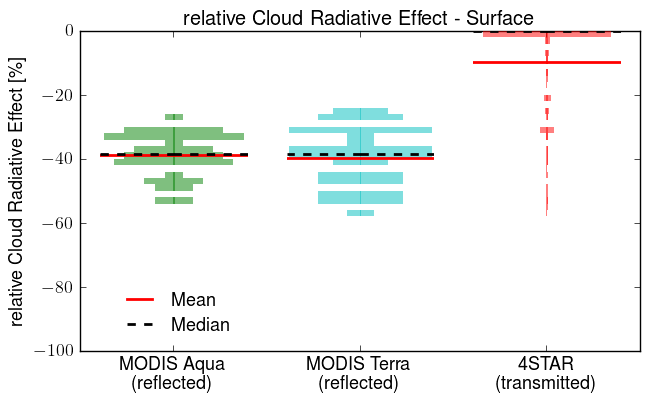

In [111]:
fig = plt.figure(figsize=(7,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-100,0],xlim=[-0.5,2.5])
ax1.set_ylabel('relative Cloud Radiative Effect [\%]')
ax1.set_title('relative Cloud Radiative Effect - Surface')
ax1.set_xticks([0,1,2])
ax1.set_xticklabels(['MODIS Aqua\n(reflected)','MODIS Terra\n(reflected)','4STAR\n(transmitted)'])
pu.plot_vert_hist(fig,ax1,waq_rcre,0,[-100,0],legend=True,onlyhist=False,loc=4,color='g',bins=50)
pu.plot_vert_hist(fig,ax1,wte_rcre,1,[-100,0],legend=True,color='c',bins=50)
pu.plot_vert_hist(fig,ax1,wst_rcre,2,[-100,0],legend=True,color='r',bins=50)
plt.savefig(fp+'plots/rcre_water.png',dpi=600,transparent=True)

In [112]:
np.nanmean(waq_rcre), np.nanmean(wte_rcre),np.nanmean(wst_rcre)

(-38.817111489589955, -39.611604925099648, -9.7067529805141213)

In [113]:
np.nanstd(waq_rcre), np.nanstd(wte_rcre),np.nanstd(wst_rcre)

(6.5614759274825882, 8.8379885902639437, 15.963943818857958)

### Do over ice now

In [117]:
iaq_dn = np.zeros_like(aqua['ref'][ind_aqua[0,pathice],ind_aqua[1,pathice]])
ite_dn = np.zeros_like(terra['ref'][ind_terra[0,pathice],ind_terra[1,pathice]])
ist_dn = np.zeros_like(stars.watref[fltice])
iaq_up = np.zeros_like(aqua['ref'][ind_aqua[0,pathice],ind_aqua[1,pathice]])
ite_up = np.zeros_like(terra['ref'][ind_terra[0,pathice],ind_terra[1,pathice]])
ist_up = np.zeros_like(stars.watref[fltice])

In [118]:
iaq_dncl = np.zeros_like(aqua['ref'][ind_aqua[0,pathice],ind_aqua[1,pathice]])
ite_dncl = np.zeros_like(terra['ref'][ind_terra[0,pathice],ind_terra[1,pathice]])
ist_dncl = np.zeros_like(stars.watref[fltice])
iaq_upcl = np.zeros_like(aqua['ref'][ind_aqua[0,pathice],ind_aqua[1,pathice]])
ite_upcl = np.zeros_like(terra['ref'][ind_terra[0,pathice],ind_terra[1,pathice]])
ist_upcl = np.zeros_like(stars.watref[fltice])

In [119]:
iaq_cre = np.zeros_like(aqua['ref'][ind_aqua[0,pathice],ind_aqua[1,pathice]])
iaq_rcre = np.zeros_like(aqua['ref'][ind_aqua[0,pathice],ind_aqua[1,pathice]])
ite_cre = np.zeros_like(terra['ref'][ind_terra[0,pathice],ind_terra[1,pathice]])
ist_cre = np.zeros_like(stars.watref[fltice])
ite_rcre = np.zeros_like(terra['ref'][ind_terra[0,pathice],ind_terra[1,pathice]])
ist_rcre = np.zeros_like(stars.watref[fltice])

In [120]:
#do over water
print sice['sp_irrdn'].shape
print 'sp (wp, wvl, z, re, ta)'

(2L, 1556L, 2L, 35L, 24L)
sp (wp, wvl, z, re, ta)


In [121]:
def get_rad_close(s,wvl,p,z,t,r):
    it = np.argmin(abs(sice['tau']-t))
    ir = np.argmin(abs(sice['ref']-r))
    return np.sum(s[p,250:,z,it,ir]*wvl[250:]/1000.0)

In [138]:
ref_dn = get_rad_close(sice['sp_irrdn'],sice['zenlambda'],0,1,0,0)

In [139]:
for i,t in enumerate(aqua['tau'][ind_aqua[0,pathice],ind_aqua[1,pathice]]):
    r = aqua['ref'][ind_aqua[0,pathice],ind_aqua[1,pathice]][i]
    iaq_dn[i] = get_rad_close(sice['sp_irrdn'],sice['zenlambda'],0,0,t,r)
    iaq_up[i] = get_rad_close(sice['sp_irrup'],sice['zenlambda'],0,0,t,r)
    iaq_dncl[i] = get_rad_close(sice['sp_irrdn'],sice['zenlambda'],0,0,0,0)
    iaq_upcl[i] = get_rad_close(sice['sp_irrup'],sice['zenlambda'],0,0,0,0)
    iaq_cre[i] = (iaq_dn[i]-iaq_up[i])-(iaq_dncl[i]-iaq_upcl[i])
    iaq_rcre[i] = iaq_cre[i]/ref_dn*100.0

In [140]:
for i,t in enumerate(terra['tau'][ind_terra[0,pathice],ind_terra[1,pathice]]):
    r = terra['ref'][ind_terra[0,pathice],ind_terra[1,pathice]][i]
    ite_dn[i] = get_rad_close(sice['sp_irrdn'],sice['zenlambda'],0,0,t,r)
    ite_up[i] = get_rad_close(sice['sp_irrup'],sice['zenlambda'],0,0,t,r)
    ite_dncl[i] = get_rad_close(sice['sp_irrdn'],sice['zenlambda'],0,0,0,0)
    ite_upcl[i] = get_rad_close(sice['sp_irrup'],sice['zenlambda'],0,0,0,0)
    ite_cre[i] = (ite_dn[i]-ite_up[i])-(ite_dncl[i]-ite_upcl[i])
    ite_rcre[i] = ite_cre[i]/ref_dn*100.0

In [141]:
for i,t in enumerate(stars.icetau[fltice]):
    r = stars.iceref[fltice][i]
    ist_dn[i] = get_rad_close(sice['sp_irrdn'],sice['zenlambda'],0,0,t,r)
    ist_up[i] = get_rad_close(sice['sp_irrup'],sice['zenlambda'],0,0,t,r)
    ist_dncl[i] = get_rad_close(sice['sp_irrdn'],sice['zenlambda'],0,0,0,0)
    ist_upcl[i] = get_rad_close(sice['sp_irrup'],sice['zenlambda'],0,0,0,0)
    ist_cre[i] = (ist_dn[i]-ist_up[i])-(ist_dncl[i]-ist_upcl[i])
    ist_rcre[i] = ist_cre[i]/ref_dn*100.0

In [142]:
import plotting_utils as pu

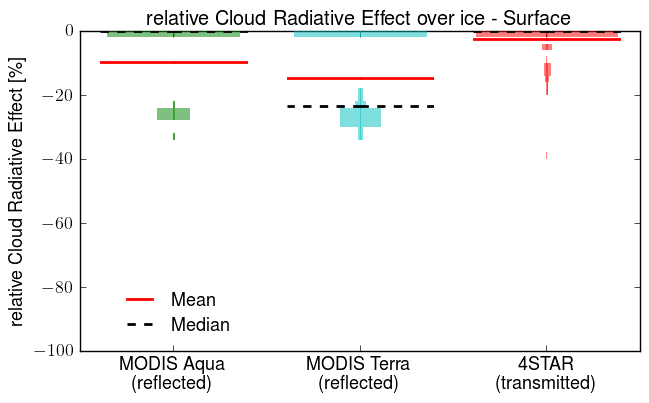

In [143]:
fig = plt.figure(figsize=(7,4))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[-100,0],xlim=[-0.5,2.5])
ax1.set_ylabel('relative Cloud Radiative Effect [\%]')
ax1.set_title('relative Cloud Radiative Effect over ice - Surface')
ax1.set_xticks([0,1,2])
ax1.set_xticklabels(['MODIS Aqua\n(reflected)','MODIS Terra\n(reflected)','4STAR\n(transmitted)'])
pu.plot_vert_hist(fig,ax1,iaq_rcre,0,[-100,0],legend=True,onlyhist=False,loc=4,color='g',bins=50)
pu.plot_vert_hist(fig,ax1,ite_rcre,1,[-100,0],legend=True,color='c',bins=50)
pu.plot_vert_hist(fig,ax1,ist_rcre,2,[-100,0],legend=True,color='r',bins=50)
plt.savefig(fp+'plots/rcre_ice.png',dpi=600,transparent=True)

In [130]:
np.nanmean(iaq_rcre), np.nanmean(ite_rcre),np.nanmean(ist_rcre)

(-9.7862021584847554, -14.801675256730379, -2.6911180399285071)

In [131]:
np.nanstd(iaq_rcre), np.nanstd(ite_rcre),np.nanstd(ist_rcre)

(12.901037427333174, 13.542785023247793, 5.5873124946413864)

# Run the advanced miscrophysics analysis

## Compare to $r_{eff}$ derived from Cloud probes

In [130]:
probe.dtype.names

('UTC_mid',
 'Latitude_deg',
 'Longitude_deg',
 'PressAlt_ft',
 'TWC_gm3',
 'LWC1_gm3',
 'LWC2_gm3',
 'PWV_cm',
 'LWP_mm',
 'Tb1_degC',
 'Tb3_degC',
 'Tb7_degC',
 'Tb14_degC',
 'nCDP_cm3',
 'vCDP_um3cm3',
 'CDP01_dNdlogD',
 'CDP02_dNdlogD',
 'CDP03_dNdlogD',
 'CDP04_dNdlogD',
 'CDP05_dNdlogD',
 'CDP06_dNdlogD',
 'CDP07_dNdlogD',
 'CDP08_dNdlogD',
 'CDP09_dNdlogD',
 'CDP10_dNdlogD',
 'CDP11_dNdlogD',
 'CDP12_dNdlogD',
 'CDP13_dNdlogD',
 'CDP14_dNdlogD',
 'CDP15_dNdlogD',
 'CDP16_dNdlogD',
 'CDP17_dNdlogD',
 'CDP18_dNdlogD',
 'CDP19_dNdlogD',
 'CDP20_dNdlogD',
 'CDP21_dNdlogD',
 'CDP22_dNdlogD',
 'CDP23_dNdlogD',
 'CDP24_dNdlogD',
 'CDP25_dNdlogD',
 'CDP26_dNdlogD',
 'CDP27_dNdlogD',
 'CDP28_dNdlogD',
 'CDP29_dNdlogD',
 'CDP30_dNdlogD')

In [180]:
flt_probe_ice = np.where((probe['UTC_mid']>19.0) & (probe['UTC_mid']<23.0) & (probe['Longitude_deg']<-133.5))[0]
flt_probe_wat = np.where((probe['UTC_mid']>19.0) & (probe['UTC_mid']<23.0) & (probe['Longitude_deg']>-130.0))[0] 

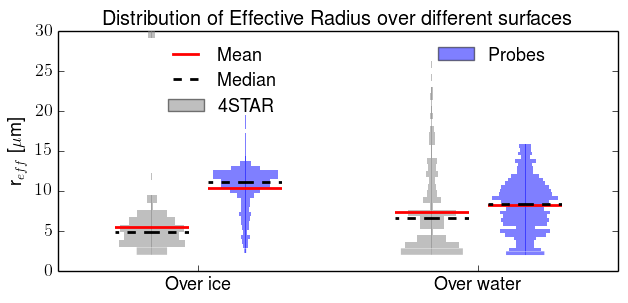

In [181]:
fig = plt.figure(figsize=(7,3))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8],ylim=[0,30],xlim=[-1,5])
ax1.set_ylabel('r$_{eff}$ [$\\mu$m]')
ax1.set_xticks([0.5,3.5])
ax1.set_xticklabels(['Over ice','Over water'])
ax1.tick_params(axis='x', which='both', top='off')
plot_vert_hist(fig,stars.iceref[fltice],0,[0,30],color='grey',label='4STAR',legend=True,onlyhist=False,loc=2)
plot_vert_hist(fig,probe_ref[flt_probe_ice],1,[0,30],color='blue')
#plot_vert_hist(fig,terra['ref'][ind_terra[0,pathice],ind_terra[1,pathice]],2,[0,30],color='green')

plot_vert_hist(fig,stars.watref[fltwat],3,[0,30],color='grey')
plot_vert_hist(fig,probe_ref[flt_probe_wat],4,[0,30],color='blue',label='Probes',legend=True,loc=1)
#plot_vert_hist(fig,aqua['ref'][ind_aqua[0,pathwat],ind_aqua[1,pathwat]],5,[0,30],color='blue',label='Aqua',legend=True,loc=1)
#plot_vert_hist(fig,terra['ref'][ind_terra[0,pathwat],ind_terra[1,pathwat]],6,[0,30],color='green',label='Terra',legend=True,loc=9)
ax1.set_title('Distribution of Effective Radius over different surfaces')
plt.savefig(fp+'plots/20140919_comp_probes_ref_forceliq.png',dpi=600,transparent=True)

# Testing different programs for metadata saving for pngs

In [334]:
def getname(): 
    import IPython
    IPython.display.display(IPython.display.Javascript('IPython.notebook.kernel.execute("theNotebookName = " + "\'"+IPython.notebook.notebook_name+"\'");'))
    IPython.display.display(IPython.display.Javascript('IPython.notebook.kernel.execute("theNotebookPath = " + "\'"+IPython.notebook.notebook_path+"\'");'))

In [ ]:
getname()
thisfilepath = os.getcwd()+os.path.sep+theNotebookPath+theNotebookName
print thisfilepath
fstat = os.stat(thisfilepath)
import datetime
time_of_mod = datetime.datetime.fromtimestamp(fstat.st_mtime).strftime('%Y-%m-%d %H:%M:%S.%f')
import getpass
user = getpass.getuser()

In [332]:
def savemetapng(filein,Notebookname,Notes=None):
    from PIL import Image
    from PIL import PngImagePlugin
    import datetime
    import getpass
    import os
    
    metadata = dict()
    metadata['Created with'] = 'IPython'+os.sys.version
    metadata['Script Name'] = Notebookname
    metadata['Time created'] = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')
    metadata['Author'] = getpass.getuser()
    if Notes:
        metadata['Notes'] = Notes
    
    im = Image.open(filein)
    meta = PngImagePlugin.PngInfo()

    for x in metadata:
        meta.add_text(x, metadata[x])
    im.save(filein, "png", pnginfo=meta)

In [333]:
savemetapng(fp+'plots_v2/box_ice_wat_COD_ref_LWP_area.png','ARISE_cloud_edge_v2')

In [335]:
getname()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>